<a href="https://colab.research.google.com/github/Nathalia-Prada/proyecto-integrador-equipo25/blob/main/Avance1Equipo25/Avance1Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance 1. Análisis exploratorio de datos**

Objetivos:

- 2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

- 2.2 Abordar y corregir los problemas identificados en los datos.



###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 29 de septiebre de 2024

# Instrucciones

Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

* ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
* ¿Cuáles son las estadísticas resumidas del conjunto de datos?
* ¿Hay valores atípicos en el conjunto de datos?
* ¿Cuál es la cardinalidad de las variables categóricas?
* ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
* ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
* ¿Hay correlación entre las variables dependientes e independientes?
* ¿Cómo se distribuyen los datos en función de diferentes categorías?
* ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
* ¿Se deberían normalizar las imágenes para visualizarlas mejor?
* ¿Hay desequilibrio en las clases de la variable objetivo?

# Análsis Exploratorio de los Datos (EDA)

In [686]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tabla silver_consumption

In [687]:
# Ruta al archivo
file = '/content/drive/MyDrive/TECForza/silver_consumption.csv'

# Leer el archivo
df_consumption= pd.read_csv(file)

In [688]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42705 entries, 0 to 42704
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     42705 non-null  int64  
 1   date                     42705 non-null  object 
 2   total_distance_used_sum  42705 non-null  float64
 3   total_fuel_used_sum      42705 non-null  float64
 4   consumption              42560 non-null  float64
 5   performance              42038 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ MB


## Nota importante sobre los datos

* **`name`**: Identifica al camión mediante un número entero. Aunque es un valor numérico, no es adecuado calcular estadísticas como promedios; se recomienda un análisis descriptivo en su lugar.
* **`date`**: Indica la fecha del registro. El formato es un objeto de tipo fecha.
* **`total_distance_used_sum`**: Representa la distancia total recorrida en millas. Es un número con decimales.
* **Consumption** y **Performance**: Son relaciones derivadas.
  * **`consumption`** es el resultado de dividir la distancia total recorrida (`total_distance_used_sum`) entre el total de combustible medido en galones (`total_fuel_used_sum`).
  * **`performance`** es el inverso de esta relación; es decir, se obtiene dividiendo el total de combustible medido en galones (`total_fuel_used_sum`) entre la distancia total recorrida en millas (`total_distance_used_sum`).

Dado lo anterior, es necesario identificar y tratar los valores cero en las columnas `total_fuel_used_sum` y `total_distance_used_sum`.

## Visualizar datos faltantes

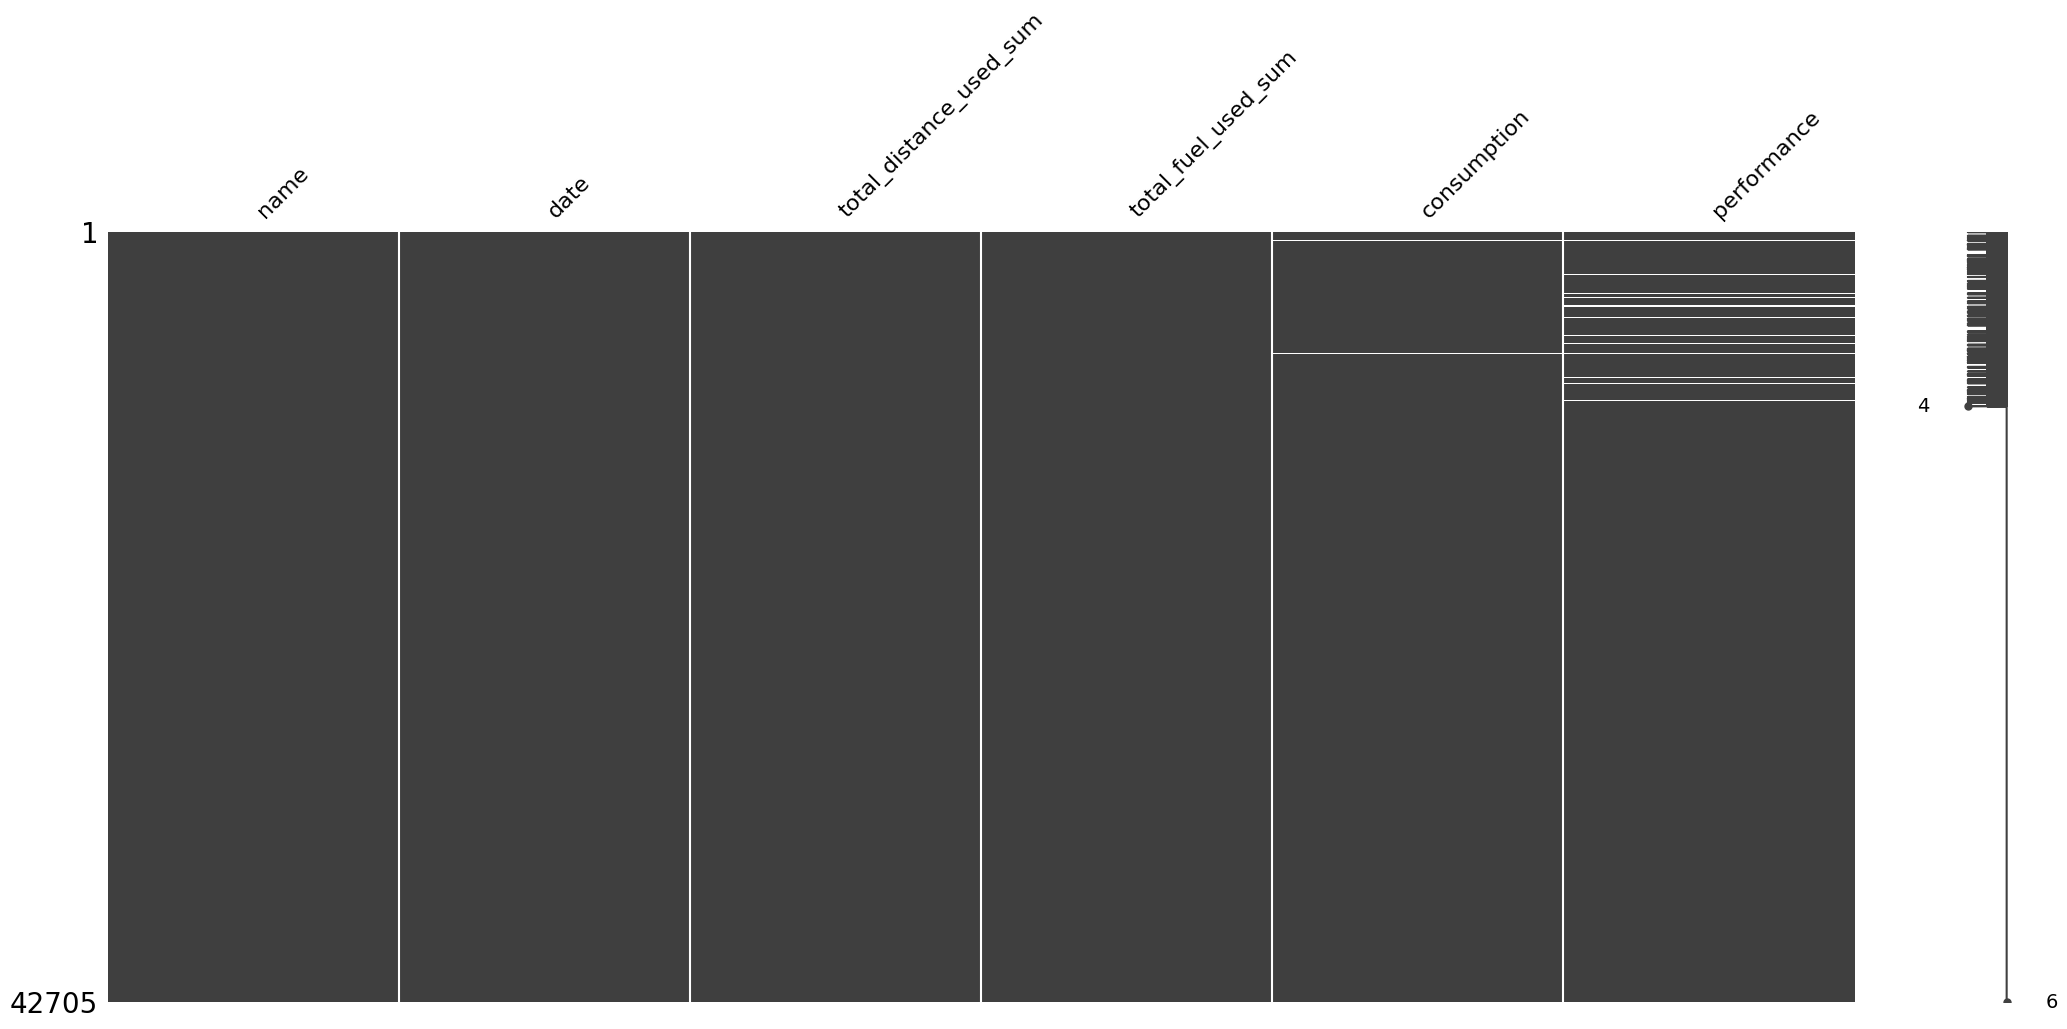

In [689]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_consumption)
plt.show()

En el gráfico se pueden identificar valores faltantes de `performance` o `consumption`. Esto puede deberse a que dichos valores son el resultado de una división entre `total_fuel_used_sum` y `total_distance_used_sum `, o viceversa. Al encontrarse un cero en el denominador, el valor se registra como nulo.

Se identifican mas valores faltantes en la columna `performance` que en la columna `consumption` Este patrón sugiere que los valores de cero en total_distance_used_sum son más frecuentes, lo que afecta principalmente a la columna performance, ya que provoca divisiones inválidas. Para abordar este problema, es importante realizar un análisis detallado de las filas con valores cero:

### Visualizar Valores en Cero

En este proceso, hemos creado una copia del DataFrame `df_consumption` llamada `df_zero_as_nan`, en la cual todos los valores iguales a 0 han sido reemplazados por `NaN`.

Reemplazar ceros por `NaN` nos permite:
1. **Identificar errores o inconsistencias**: Los ceros pueden ser indicadores de datos erróneos o incompletos.
2. **Evitar problemas en análisis posteriores**: Al tratar los ceros como valores faltantes, podemos manejar estos casos con imputaciones, eliminación de filas, o realizar análisis más precisos.
3. **Visualizar mejor la magnitud de los datos faltantes**: Convertir los ceros a `NaN` nos ayuda a visualizar de manera más clara las posiciones donde se deben tomar decisiones respecto al manejo de los datos ausentes.

A continuación, se utiliza la función `msno.matrix()` para visualizar los datos faltantes en `df_zero_as_nan`. El gráfico muestra en color oscuro las posiciones donde los valores faltantes (incluidos los ceros convertidos a `NaN`) están presentes. Esto facilita la identificación de patrones y nos permite tomar decisiones sobre cómo tratar los valores nulos.

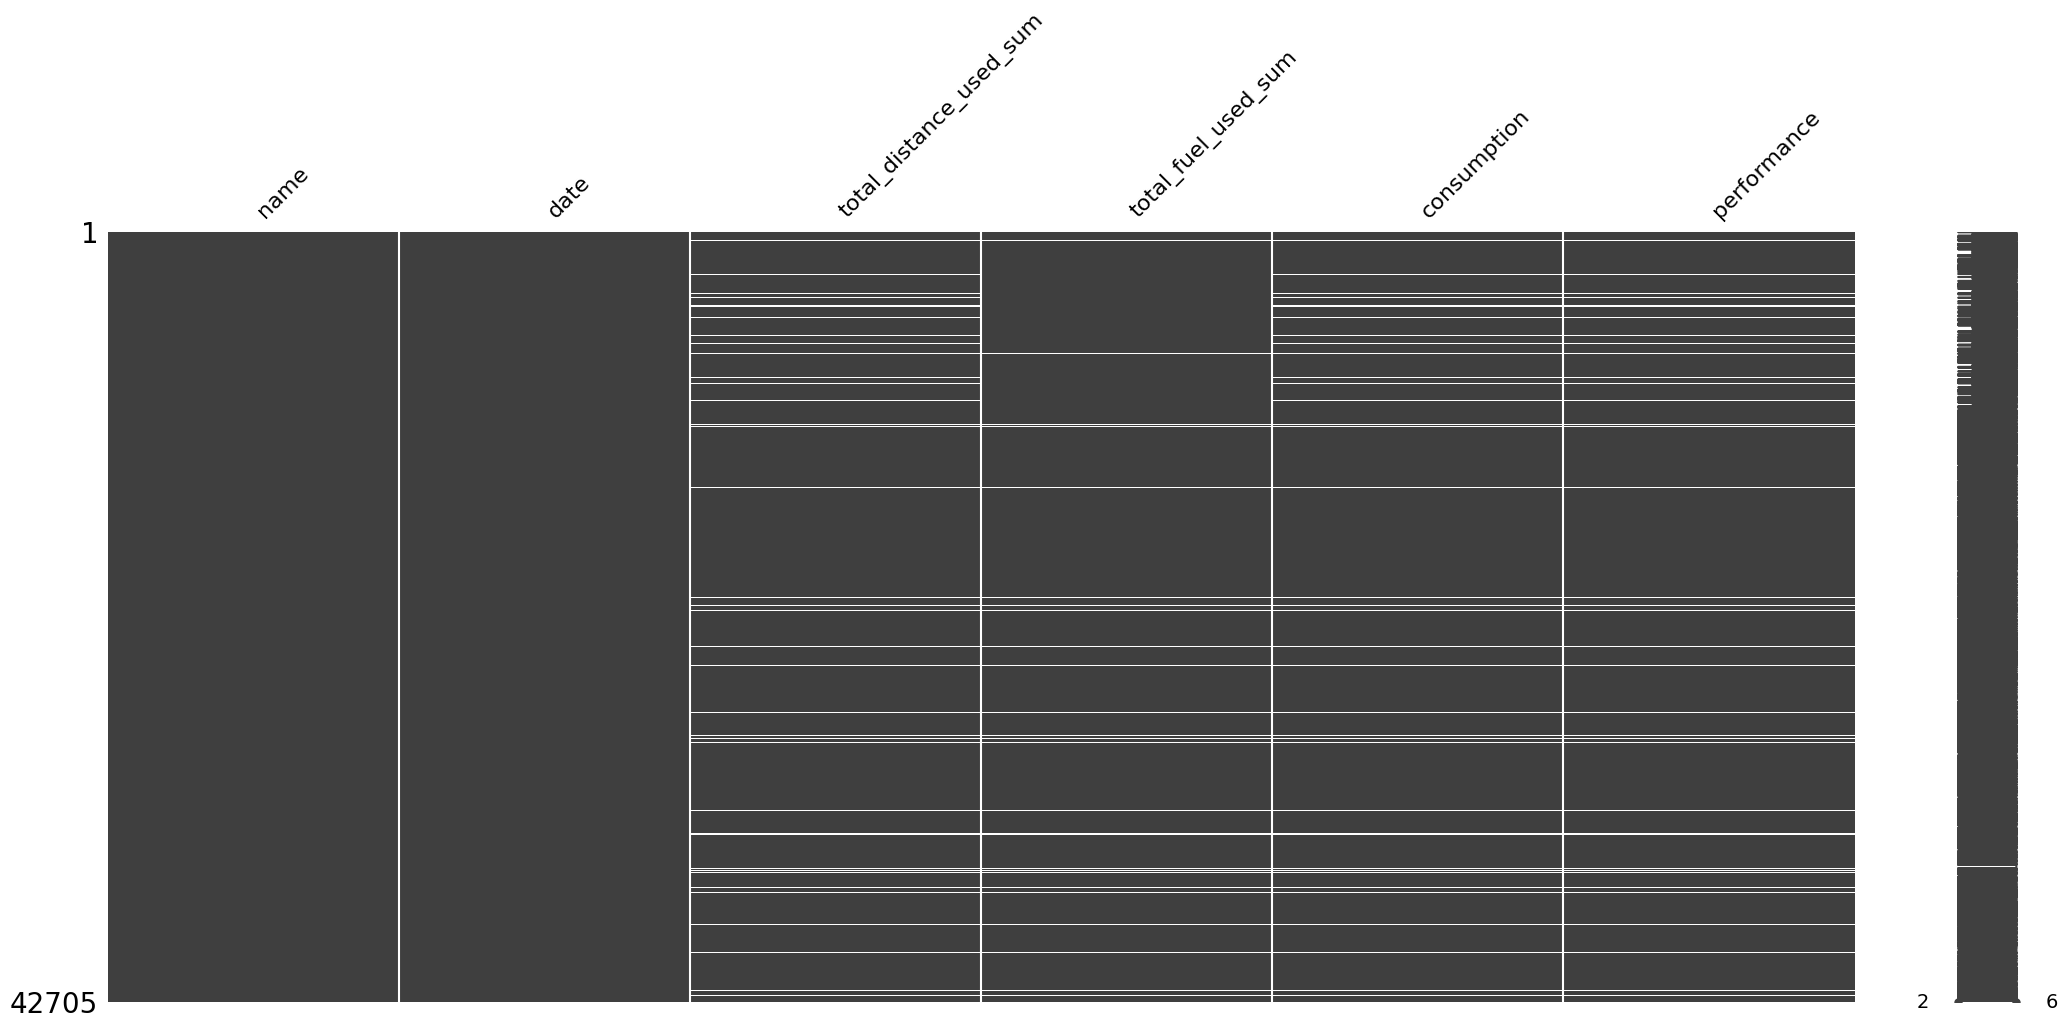

In [690]:
# Copia del dataframe para reemplazar ceros por NaN
df_zero_as_nan = df_consumption.replace(0, np.nan)

# Visualizar la falta de datos y los ceros
msno.matrix(df_zero_as_nan)
plt.show()

In [691]:
def verificar_datos(df):
    """
    Verifica duplicados, valores faltantes y filas con valores en cero en el DataFrame.

    Args:
    df (pd.DataFrame): DataFrame a analizar.
    """
    # Verificar si hay filas duplicadas
    filas_duplicadas = df[df.duplicated()]
    numero_filas_duplicadas = len(filas_duplicadas)

    # Verificar si hay valores faltantes
    valores_faltantes = df.isnull().sum()

    # Verificar si hay filas con valores en cero
    filas_con_ceros = df[(df == 0).any(axis=1)]
    numero_filas_con_ceros = len(filas_con_ceros)

    # Verificar cuántos valores en cero hay en cada columna
    valores_en_cero = (df == 0).sum()

    # Imprimir los resultados
    print(f"Número de filas duplicadas: {numero_filas_duplicadas}")
    print("\nValores faltantes por columna:")
    print(valores_faltantes)
    print(f"\nNúmero de filas con al menos un valor en cero: {numero_filas_con_ceros}")
    print("\nValores en cero por columna:")
    print(valores_en_cero)

# Ejemplo de uso
verificar_datos(df_consumption)


Número de filas duplicadas: 0

Valores faltantes por columna:
name                         0
date                         0
total_distance_used_sum      0
total_fuel_used_sum          0
consumption                145
performance                667
dtype: int64

Número de filas con al menos un valor en cero: 2330

Valores en cero por columna:
name                          0
date                          0
total_distance_used_sum    2314
total_fuel_used_sum        1792
consumption                2185
performance                1663
dtype: int64


In [692]:
def contar_filas_con_ceros(df, columnas_a_excluir):
    """
    Cuenta las filas donde todas las columnas, excepto las especificadas en columnas_a_excluir,
    tienen valores de cero. También calcula el porcentaje de estas filas con respecto
    al total del dataset e imprime los resultados.

    Args:
    df (pd.DataFrame): DataFrame a analizar.
    columnas_a_excluir (list): Lista de columnas que se excluyen del chequeo de ceros.
    """
    # Crea una máscara para identificar filas donde todas las columnas, excepto las excluidas, son cero
    mascara = (df.drop(columns=columnas_a_excluir) == 0).all(axis=1)

    # Cuenta el número de filas que cumplen la condición
    numero_filas_con_ceros = mascara.sum()

    # Obtiene el número total de filas en el DataFrame
    numero_total_filas = len(df)

    # Calcula el porcentaje sobre el total de filas del dataset
    porcentaje_filas_con_ceros = (numero_filas_con_ceros / numero_total_filas) * 100

    # Imprime los resultados
    print(f"Número total de filas en el DataFrame: {numero_total_filas}")
    print(f"Número de filas con todas las columnas en cero (excepto {columnas_a_excluir}): {numero_filas_con_ceros}")
    print(f"Porcentaje de filas con todas las columnas en cero: {porcentaje_filas_con_ceros:.2f}%")


# Ejemplo de uso
columnas_a_excluir = ['name', 'date']
contar_filas_con_ceros(df_consumption, columnas_a_excluir)

Número total de filas en el DataFrame: 42705
Número de filas con todas las columnas en cero (excepto ['name', 'date']): 1647
Porcentaje de filas con todas las columnas en cero: 3.86%


## ¿Existen valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

El análisis del conjunto de datos revela lo siguiente:

- **Número total de filas en el DataFrame**: 42,705
- **Número de filas con todas las columnas en cero (excepto ['name', 'date'])**: 1,647
- **Porcentaje de filas con todas las columnas en cero**: 3.86%

Se detectaron **2,330 filas** de un total de 49,825 donde alguno de los valores de `total_fuel_used_sum` o `total_distance_used_sum` es igual a cero. Estas filas deben ser eliminadas o tratadas adecuadamente, ya que los valores cero podrían representar datos no válidos o ausentes. Además, se encontraron **812 filas** con valores nulos en las columnas `consumption` o `performance`.  impacto en los resultados.

### Patrones de ausencia

Se identifican patrones claros en los datos:

- Las filas con valores cero en las columnas `total_distance_used_sum` o `total_fuel_used_sum` afectan directamente a las columnas derivadas como `consumption` y `performance`. Esto genera valores nulos o ceros en dichas columnas, lo que sugiere que la ausencia de datos en estas columnas principales (distancia y combustible) tiene un impacto directo en la calidad de los cálculos subsecuentes.
- En total, **2,330 filas** presentan este problema de ceros en las columnas de distancia o combustible, y **667 filas** tienen datos faltantes o inconsistentes en `performance`, lo que puede reflejar una correlación entre la falta de movimiento o consumo de combustible y la ausencia de datos de rendimiento.

Con esta información, se sugiere crear un nuevo DataFrame, `df_consumption_limpio`, sin las filas afectadas para asegurar un análisis más preciso y evitar distorsiones en los resultados futuros.

In [693]:
# Eliminar filas donde total_distance_used_sum o total_fuel_used_sum sean igual a cero
df_consumption_limpio = df_consumption[
    (df_consumption['total_distance_used_sum'] != 0) |
    (df_consumption['total_fuel_used_sum'] != 0)
]

# Eliminar filas con valores nulos
df_consumption_limpio = df_consumption_limpio.dropna()

# Mostrar el nuevo dataframe limpio
print(df_consumption_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40375 entries, 0 to 42704
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     40375 non-null  int64  
 1   date                     40375 non-null  object 
 2   total_distance_used_sum  40375 non-null  float64
 3   total_fuel_used_sum      40375 non-null  float64
 4   consumption              40375 non-null  float64
 5   performance              40375 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ MB
None


Luego de la limpieza, el DataFrame retiene el 94.5% de la información original, es decir, 40,375 filas de un total de 42,705.

## **Estadística descriptiva**

vamos a separar las variables categóricas de las variables numéricas así:
* Variables categóricas: name, date.
* Variables numéricas: total_distance_used_sum, total_fuel_used_sum, consumption y performance.

Con esto vamos a generar las estadísticas descriptivas.

In [694]:
# Lista de variables categóricas
variables_categoricas = ['name', 'date']

# Lista de variables numéricas
variables_numericas = ['total_distance_used_sum', 'total_fuel_used_sum', 'consumption', 'performance']


**Análisis variables numéricas**

In [695]:
# Obtener estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
df_consumption_limpio[variables_numericas].describe()

Estadísticas descriptivas de las variables numéricas:


,total_distance_used_sum,total_fuel_used_sum,consumption,performance
count,40375.000000,40375.000000,40375.000000,40375.000000
mean,620.193296,60.569598,8.461822,0.148258
std,439.203065,35.737487,2.218248,0.495052
min,0.621371,0.264172,0.039202,0.000302
25%,333.054856,33.549844,7.559750,0.081844
50%,570.418578,59.702872,8.571378,0.116667
75%,800.325848,81.100804,8.959763,0.132280
max,3396.413886,234.320564,14.865050,25.508625


El análisis de las variables numéricas del dataset revela lo siguiente:

- La media de **total_distance_used_sum** es de 620.19 millas, con una desviación estándar de 439.20, lo que indica una alta dispersión en las distancias recorridas.
- En cuanto al **total_fuel_used_sum**, el promedio de combustible utilizado es de 60.57 unidades, con una desviación estándar de 35.74.
- La columna **consumption** tiene una media de 8.46, con una variabilidad moderada, mientras que la **performance** promedio es de 0.15, con algunos valores atípicos evidentes en el máximo de 25.51.
- Los valores mínimos y máximos en todas las métricas revelan una amplia gama de comportamientos en la flota, destacando la heterogeneidad en rendimiento y consumo.

Este análisis proporciona una visión de la tendencia central y la dispersión de las métricas clave de la flota de vehículos.

## **Variables categóricas**

In [696]:
for column in variables_categoricas:
    print(f"Estadísticas de la variable categórica: {column}")
    print("Frecuencia de valores:")
    print(df_consumption_limpio[column].value_counts())  # Frecuencia de cada valor
    print(f"Cantidad de valores únicos: {df_consumption[column].nunique()}")  # Número de valores únicos
    print(f"Valor más frecuente: {df_consumption_limpio[column].mode()[0]}")  # Valor más común
    print("\n")

Estadísticas de la variable categórica: name
Frecuencia de valores:
name
894     61
714     61
1016    61
639     61
934     61
        ..
75       1
1326     1
443      1
805      1
1340     1
Name: count, Length: 892, dtype: int64
Cantidad de valores únicos: 902
Valor más frecuente: 602


Estadísticas de la variable categórica: date
Frecuencia de valores:
date
2024-08-28    805
2024-08-29    800
2024-08-27    794
2024-08-30    775
2024-08-26    765
             ... 
2024-07-21    544
2024-08-11    539
2024-07-14    535
2024-08-04    532
2024-07-07    511
Name: count, Length: 61, dtype: int64
Cantidad de valores únicos: 61
Valor más frecuente: 2024-08-28




In [697]:
df_consumption.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,42705.0,NaN,NaN,NaN,835.367802,242.907206,24.0,639.0,840.0,1048.0,1352.0
date,42705,61,2024-08-29,833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_distance_used_sum,42705.0,NaN,NaN,NaN,586.501734,449.751518,0.0,265.325417,551.156077,768.635927,3396.413886
total_fuel_used_sum,42705.0,NaN,NaN,NaN,57.344018,37.26228,0.0,27.473888,57.061152,79.779944,234.320564
consumption,42560.0,NaN,NaN,NaN,8.027398,2.855761,0.0,7.372371,8.451064,8.884624,14.86505
performance,42038.0,NaN,NaN,NaN,0.142393,0.486021,0.0,0.074248,0.115396,0.131488,25.508625


### Conversión de la Columna de Fechas

Vamos a trabajar con una columna de fechas del DataFrame `df_consumption`.

A continuación, detallamos el proceso que llevaremos a cabo para convertir la columna 'date' en un formato que Python pueda entender como un objeto de tipo `datetime`. Esto nos ayudará a realizar análisis temporales de manera más efectiva.

### Pasos a Seguir

1. **Conversión Inicial de Fechas**: Primero, intentaremos convertir los valores de la columna 'date' al tipo `datetime` utilizando el formato `YYYY-MM-DD`. Para asegurarnos de manejar cualquier entrada que no cumpla con este formato, utilizaremos el parámetro `errors='coerce'`. Esto significa que cualquier fecha que no se pueda convertir se establecerá como `NaT` (Not a Time), lo que nos permitirá identificar más tarde qué entradas necesitan ser revisadas.

2. **Identificación de Formatos Inválidos**: Después de la conversión inicial, filtraremos y mostraremos las fechas que no se pudieron convertir. Esto es importante porque nos permite identificar rápidamente los datos problemáticos que podrían interferir con nuestro análisis.

3. **Conversión Definitiva**: Si no encontramos fechas inválidas, procederemos a realizar una conversión definitiva de la columna 'date' a `datetime`. Esto asegurará que todas las entradas en nuestra columna de fechas sean válidas y estén listas para su análisis.

4. **Análisis de Datos**: Finalmente, una vez que tengamos la columna convertida, obtendremos estadísticas descriptivas que nos darán una visión general de los datos de fechas en nuestro DataFrame. Esto incluirá información como la cantidad de fechas, el rango de fechas y otros detalles relevantes.

A continuación, se presenta el código que ejecuta este proceso:

In [698]:
def convertir_fecha(df, columna_fecha):
    # Convertir la columna a datetime sin modificar el DataFrame original
    date_converted = pd.to_datetime(df[columna_fecha], errors='coerce')

    # Filtrar y mostrar los valores que no se pudieron convertir
    invalid_dates = df[date_converted.isna()][columna_fecha]

    # Imprimir los valores que no tienen el formato correcto
    print("Valores con formato incorrecto:")
    print(invalid_dates)

    # Asegurarse de que no haya formatos inválidos antes de aplicar la conversión final
    if invalid_dates.empty:
        # Ya tenemos la conversión exitosa en 'date_converted', podemos asignarla directamente
        df[columna_fecha] = date_converted
        print(f"La columna '{columna_fecha}' ha sido convertida a datetime correctamente.")
    else:
        print(f"Hay fechas inválidas en la columna '{columna_fecha}', corrígelas antes de continuar.")

    # Obtener estadísticas descriptivas de la columna 'date'
    print(df[columna_fecha].describe())
    print(df[columna_fecha].dtype)  # Verificar el tipo de datos

# Uso de la función
convertir_fecha(df_consumption, 'date')

Valores con formato incorrecto:
Series([], Name: date, dtype: object)
La columna 'date' ha sido convertida a datetime correctamente.
count                            42705
mean     2024-07-31 17:41:17.639620608
min                2024-07-01 00:00:00
25%                2024-07-16 00:00:00
50%                2024-08-01 00:00:00
75%                2024-08-17 00:00:00
max                2024-08-31 00:00:00
Name: date, dtype: object
datetime64[ns]


Las fechas en el conjunto de datos están distribuidas entre el **1 de julio de 2024** y el **31 de agosto de 2024**, lo que sugiere que el rango temporal cubierto por el dataset es de dos meses.  
Los cuartiles indican una distribución relativamente uniforme de los eventos entre julio y agosto, aunque el 25% de los eventos más recientes ocurrió después del **17 de agosto de 2024**, lo que sugiere una ligera concentración hacia finales de agosto.

In [699]:
# Calcular la cardinalidad de las variables categóricas
cardinalidad_name = df_consumption_limpio['name'].nunique()
cardinalidad_date = df_consumption_limpio['date'].nunique()

# Crear un diccionario con las cardinalidades
cardinalidad_categoricas = {
    'name': cardinalidad_name,
    'date': cardinalidad_date
}

cardinalidad_categoricas

{'name': 892, 'date': 61}

### Análisis de las variables categóricas:

#### 1. **Variable categórica: `name`**

- **Frecuencia de valores**: La columna `name` contiene identificadores únicos para cada camión en el conjunto de datos. Hay varias entradas donde ciertos camiones (por ejemplo, los camiones con ID `894`, `714`, `1016`, etc.) aparecen 61 veces, lo que indica que esos camiones tienen múltiples registros en el dataset, probablemente por múltiples viajes o mediciones en distintos días.
  
- **Cantidad de valores únicos**: Hay 892 valores únicos en la columna `name`, lo que significa que el dataset incluye datos de 892 camiones diferentes.

- **Valor más frecuente**: El camión con el identificador `602` es el que tiene más registros, aunque el valor específico de su frecuencia no se ha mostrado en este fragmento, podemos inferir que es uno de los camiones con 61 registros.

**Interpretación**:
- La columna `name` tiene una distribución relativamente uniforme entre los camiones, con muchos de ellos apareciendo varias veces.
- La gran cantidad de valores únicos y la similitud en la frecuencia de aparición (61 para muchos camiones) sugiere que los datos están bien distribuidos entre los camiones, probablemente reflejando múltiples mediciones por camión en diferentes fechas.
- Del análisis anterior, observamos que hay camiones que aparecen únicamente una vez, lo que requiere decidir si mantener o descartar estos datos. Esta situación se evaluará mejor al analizar el balanceo de los datos para el modelo.

#### 2. **Variable categórica: `date`**

- **Frecuencia de valores**: La columna `date` representa la fecha en la que se registraron los datos. Las fechas más comunes incluyen `2024-08-28`, `2024-08-29`, `2024-08-27`, entre otras, con más de 500 registros por día. Esto indica que los datos fueron recopilados principalmente en el mes de agosto de 2024.

- **Cantidad de valores únicos**: Hay 61 fechas únicas en el conjunto de datos, lo que probablemente representa un rango de días continuos o de días seleccionados dentro de un periodo específico.

- **Valor más frecuente**: La fecha con más registros es `2024-08-28`, lo que sugiere que este día hubo un mayor número de actividades o mediciones realizadas.

**Interpretación**:
- El dataset cubre un rango de 61 días, lo cual es relativamente breve pero con una cantidad significativa de datos por día.
- Los datos parecen concentrarse a finales de agosto de 2024, con varios días alcanzando más de 500 registros.
- La variabilidad en los registros por día puede reflejar el ritmo de operación de la flota de camiones, donde algunos días podrían haber tenido más actividad que otros.

### Conclusión general:
- **`name`**: Los camiones tienen múltiples registros, y aunque hay 892 camiones diferentes, algunos tienen un número significativo de registros (61), lo que sugiere que el dataset contiene varias mediciones por camión.
- **`date`**: Los datos de fechas están bien distribuidos en un periodo de 61 días, con algunas fechas concentrando más datos, especialmente hacia finales de agosto de 2024.

Además, al calcular la cardinalidad de las variables categóricas, encontramos:
- **`name`**: Tiene 892 valores únicos.
- **`date`**: Tiene 61 valores únicos, correspondientes a dos meses de datos.

Estos análisis permiten entender mejor la estructura temporal y la cobertura de la flota de camiones, ayudando a identificar patrones de actividad y el comportamiento de los vehículos a lo largo del tiempo.

## **Distribuciones de los datos en consumption**


En los siguientes gráficos se muestra la distribución de las variables numéricas.

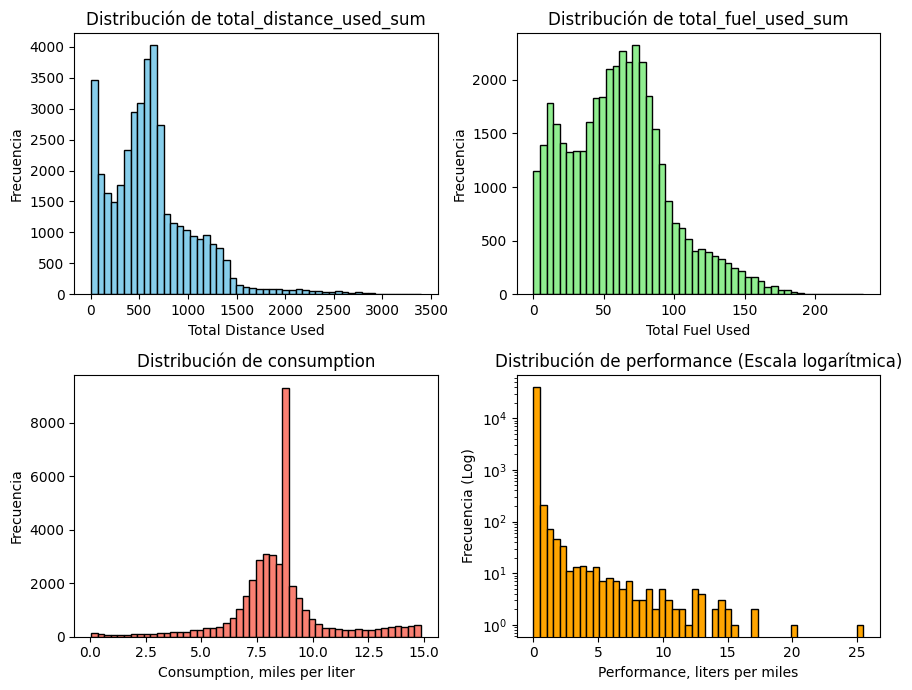

In [700]:
# Crear una figura con un grid de 2x2 para las distribuciones de las cuatro variables numéricas
plt.figure(figsize=(9, 7))

# Subplot 1: total_distance_used_sum
plt.subplot(2, 2, 1)
plt.hist(df_consumption_limpio['total_distance_used_sum'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de total_distance_used_sum')
plt.xlabel('Total Distance Used')
plt.ylabel('Frecuencia')

# Subplot 2: total_fuel_used_sum
plt.subplot(2, 2, 2)
plt.hist(df_consumption_limpio['total_fuel_used_sum'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de total_fuel_used_sum')
plt.xlabel('Total Fuel Used')
plt.ylabel('Frecuencia')

# Subplot 3: consumption
plt.subplot(2, 2, 3)
plt.hist(df_consumption_limpio['consumption'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribución de consumption')
plt.xlabel('Consumption, miles per liter')
plt.ylabel('Frecuencia')

# Subplot 4: performance (eje Y logarítmico)
plt.subplot(2, 2, 4)
plt.hist(df_consumption_limpio['performance'], bins=50, color='orange', edgecolor='black')
plt.yscale('log')
plt.title('Distribución de performance (Escala logarítmica)')
plt.xlabel('Performance, liters per miles')
plt.ylabel('Frecuencia (Log)')

# Ajustar los subplots
plt.tight_layout()
plt.show()

Es interesante el comportamiento de la variable `consumption` en millas por litro, que se obtiene al dividir la distancia recorrida entre el consumo total de combustible. La normalidad de los datos es evidente, aunque hay un valor que presenta una frecuencia muy alta. También se observan casos en los que se logra más millas por galón, lo cual se encuentra en la parte derecha de la distribución.

En el caso del `performance`, medido en litros por milla, que corresponde al inverso de la gráfica de `consumption`, fue necesario representar el eje y en escala logarítmica para mejorar la visualización. Se destaca que hay situaciones en las que se han registrado consumos de combustible superiores a **0,8 litros por milla**, lo que representa el **0,8%** de los datos. Además, el rendimiento con mayor frecuencia se encuentra entre **0,1** y **0,2 litros por milla**, abarcando un **64%** de los registros.

### Distribución de performance

A continuación, se presenta el código para crear intervalos de **0.1** en la variable **performance**. Este análisis tiene como objetivo agrupar los datos de `performance` en rangos específicos y calcular la frecuencia de registros dentro de cada intervalo.

Primero, se definen los intervalos utilizando `np.arange`, que genera un rango de valores de **0** a **1.1** con un paso de **0.1**. Luego, se utiliza la función `pd.cut` para agrupar los datos de **performance** dentro de esos intervalos, y se cuenta la cantidad de observaciones en cada uno.

Finalmente, se calcula el porcentaje de datos que corresponde a cada intervalo, dividiendo la frecuencia de cada grupo por el total de registros en **df_consumption_limpio** y multiplicando por **100**. Este análisis permitirá visualizar cómo se distribuyen los valores de **performance** en los diferentes rangos establecidos.

In [701]:
# Crear los intervalos de 0.1 para la variable 'performance'
bins = np.arange(0, 1.1, 0.1)

# Agrupar los datos de 'performance' en los intervalos y contar las frecuencias
performance_freq = pd.cut(df_consumption_limpio['performance'], bins=bins, include_lowest=True).value_counts().sort_index()

# Calcular el porcentaje de los datos en cada intervalo
performance_freq_percentage = (performance_freq / len(df_consumption_limpio['performance'])) * 100

performance_freq_percentage

,count
performance,
"(-0.001, 0.1]",31.078638
"(0.1, 0.2]",63.754799
"(0.2, 0.3]",2.712074
"(0.3, 0.4]",0.770279
"(0.4, 0.5]",0.408669
"(0.5, 0.6]",0.195666
"(0.6, 0.7]",0.099071
"(0.7, 0.8]",0.076780
"(0.8, 0.9]",0.118885


### Observaciones Clave

1. **Concentración en los primeros intervalos**:
   - Más del **94%** de los datos se agrupan en los primeros dos intervalos **(-0.001, 0.1]** y **(0.1, 0.2]**. Esto indica que una gran parte de las observaciones tiene un **performance** relativamente bajo, lo que sugiere un consumo de combustible ineficiente en esos rangos.

2. **Rango de performance**:
   - El primer intervalo **(-0.001, 0.1]** representa un **31.08%** de los datos, mientras que el intervalo **(0.1, 0.2]** capta el **63.75%**. Juntos, estos dos intervalos suman aproximadamente **94.83%** de los registros, lo que resalta que los valores de performance son predominantemente bajos.

3. **Pocas observaciones en rangos superiores**:
   - A medida que se avanza hacia los intervalos superiores (de **0.2** en adelante), la frecuencia de los datos disminuye drásticamente. Por ejemplo, solo **2.71%** de los datos se encuentran en el intervalo **(0.2, 0.3]**, y menos del **1%** en intervalos superiores, indicando que hay muy pocos casos de un rendimiento superior a **0.3 litros por milla**.

4. **Desviación en el intervalo negativo**:
   - El intervalo **(-0.001, 0.1]** podría requerir una revisión adicional, ya que representa valores extremadamente bajos de **performance**. Esto podría ser un indicativo de errores de registro o anomalías en los datos que deben ser investigadas.

5. **Implicaciones para el análisis**:
   - La alta concentración de valores bajos de **performance** sugiere la necesidad de investigar las causas detrás de este comportamiento. Podría ser útil considerar factores como el tipo de vehículos, condiciones de conducción, o la calidad del combustible utilizado, que pueden influir en la eficiencia del combustible.

### Conclusión

El análisis de la variable **performance** revela una predominancia de valores bajos, lo que indica un consumo de combustible ineficiente en la mayoría de los casos. Es esencial profundizar en los datos para entender las causas de esta distribución y explorar posibles mejoras en la eficiencia del combustible.

### Normalización de los datos

Los datos presentan un sesgo evidente, por lo que se aplicarán diversas transformaciones para identificar la mejor alternativa. Se probarán la raíz cuadrada, el logaritmo y la transformación de Box-Cox.


Este código aplica tres transformaciones matemáticas a las variables numéricas del dataframe:

1. **Transformación logarítmica:** Utiliza `np.log1p`, que aplica el logaritmo natural a cada valor sumando uno, lo que ayuda a manejar distribuciones sesgadas o valores muy grandes.

2. **Transformación raíz cuadrada:** Utiliza `np.sqrt` para reducir el rango de los datos, suavizando las diferencias entre valores grandes y pequeños.

3. **Transformación Box-Cox:** Aplica una transformación estadística que ajusta los datos para que se aproximen a una distribución normal. Se añade 1 a los valores originales para evitar errores en el cálculo de Box-Cox si existen ceros o valores negativos.

Cada transformación busca mejorar la distribución de los datos para su uso en modelos predictivos o análisis posteriores.

Como se observará, la transformación que genera distribuciones más adecuadas es la de Box-Cox.

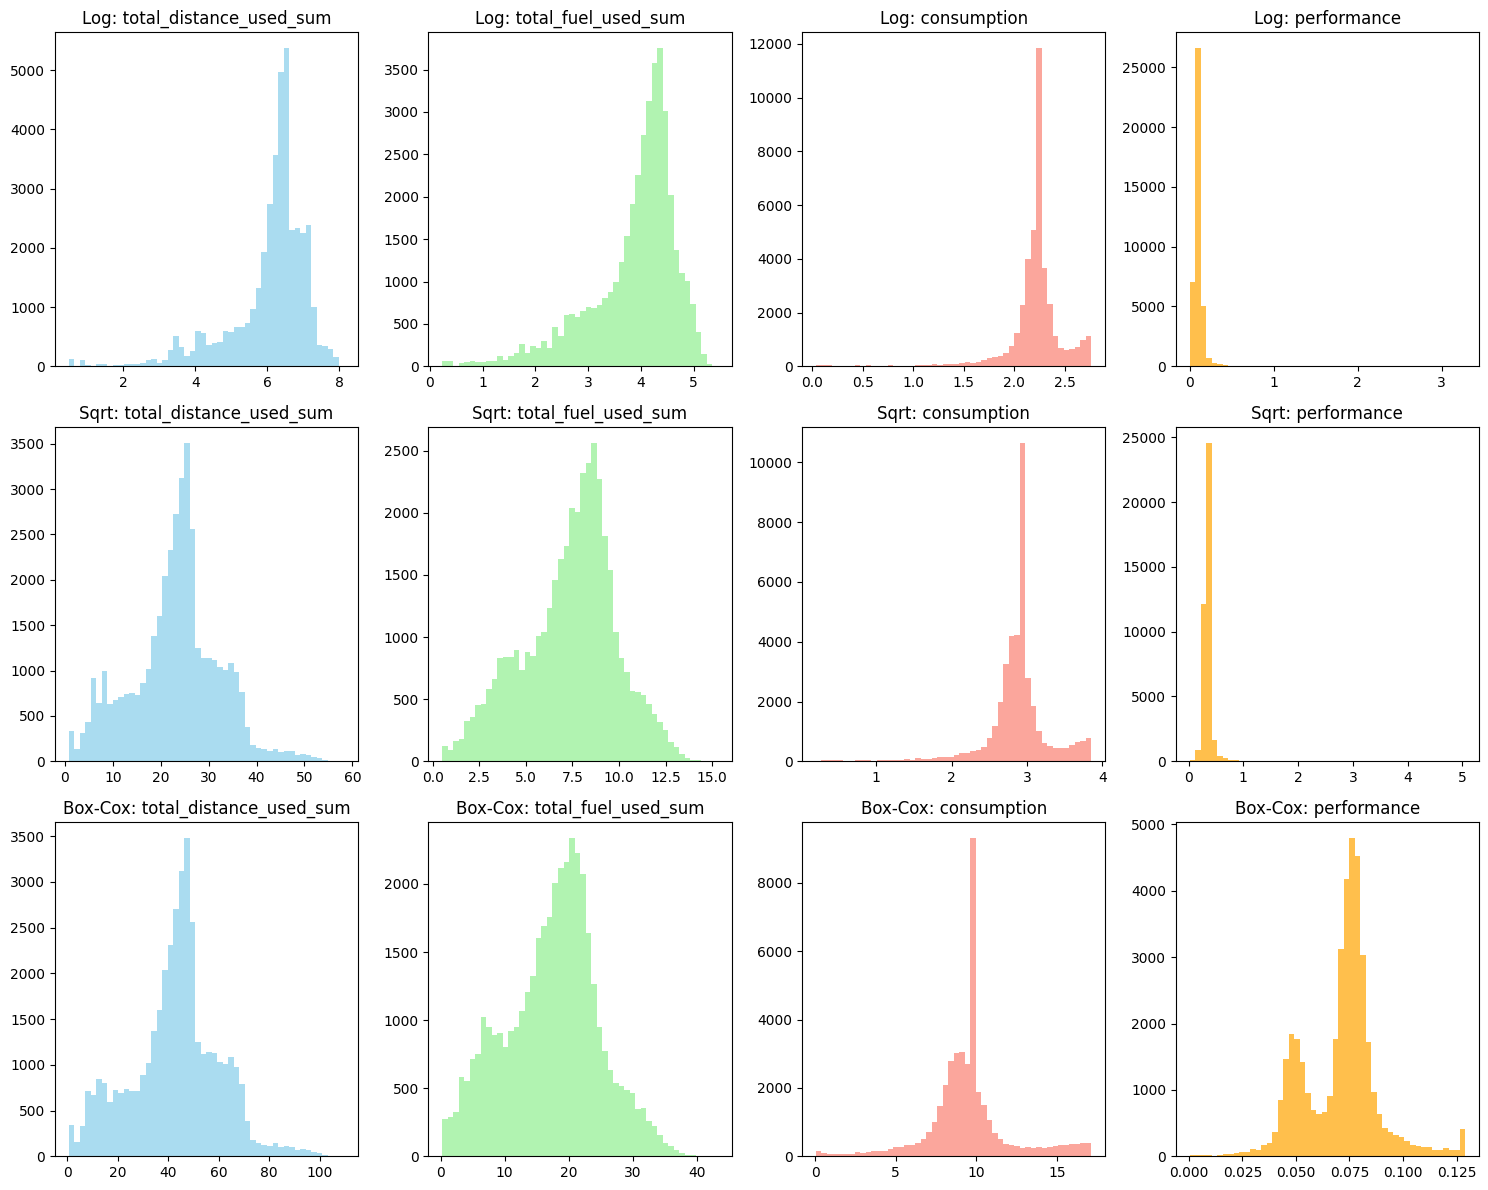

In [702]:
import numpy as np
from scipy import stats

# Crear una copia del dataframe para aplicar las transformaciones
df_transform = df_consumption_limpio[variables_numericas].copy()

# 1. Transformación logarítmica
log_transform = np.log1p(df_transform)

# 2. Transformación raíz cuadrada
sqrt_transform = np.sqrt(df_transform)

# 3. Transformación Box-Cox
# Añadir 1 a las columnas para evitar errores en Box-Cox si hay ceros o valores negativos
boxcox_transform = df_transform.copy()
for col in variables_numericas:
    boxcox_transform[col], _ = stats.boxcox(df_transform[col] + 1)


# Crear gráficos para comparar las distribuciones de las tres transformaciones con los colores personalizados
plt.figure(figsize=(15, 12))

# Distribución Logarítmica
plt.subplot(3, 4, 1)
plt.hist(log_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Log: total_distance_used_sum')

plt.subplot(3, 4, 2)
plt.hist(log_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Log: total_fuel_used_sum')

plt.subplot(3, 4, 3)
plt.hist(log_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Log: consumption')

plt.subplot(3, 4, 4)
plt.hist(log_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Log: performance')

# Distribución Raíz Cuadrada
plt.subplot(3, 4, 5)
plt.hist(sqrt_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Sqrt: total_distance_used_sum')

plt.subplot(3, 4, 6)
plt.hist(sqrt_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Sqrt: total_fuel_used_sum')

plt.subplot(3, 4, 7)
plt.hist(sqrt_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Sqrt: consumption')

plt.subplot(3, 4, 8)
plt.hist(sqrt_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Sqrt: performance')

# Distribución Box-Cox
plt.subplot(3, 4, 9)
plt.hist(boxcox_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Box-Cox: total_distance_used_sum')

plt.subplot(3, 4, 10)
plt.hist(boxcox_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Box-Cox: total_fuel_used_sum')

plt.subplot(3, 4, 11)
plt.hist(boxcox_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Box-Cox: consumption')

plt.subplot(3, 4, 12)
plt.hist(boxcox_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Box-Cox: performance')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

### Efecto de la temporalidad en los datos

Al analizar los datos a lo largo del tiempo, se observan patrones significativos. Entre el 1 y el 7 de julio de 2024, el promedio diario de distancia recorrida fue de 900 millas. Sin embargo, después de esta fecha, el promedio cae a 500 millas por día. Curiosamente, el consumo total de combustible no refleja una disminución proporcional, ya que solo pasa de un promedio de 62 litros a 56 litros diarios después del 7 de julio.

Esta discrepancia sugiere un impacto significativo en la eficiencia del consumo, ya que, a pesar de recorrer 400 millas menos al día, el consumo de combustible se reduce solo en 6 litros. Esta situación requerirá una investigación más profunda junto al equipo de negocio para entender las causas detrás de este comportamiento.

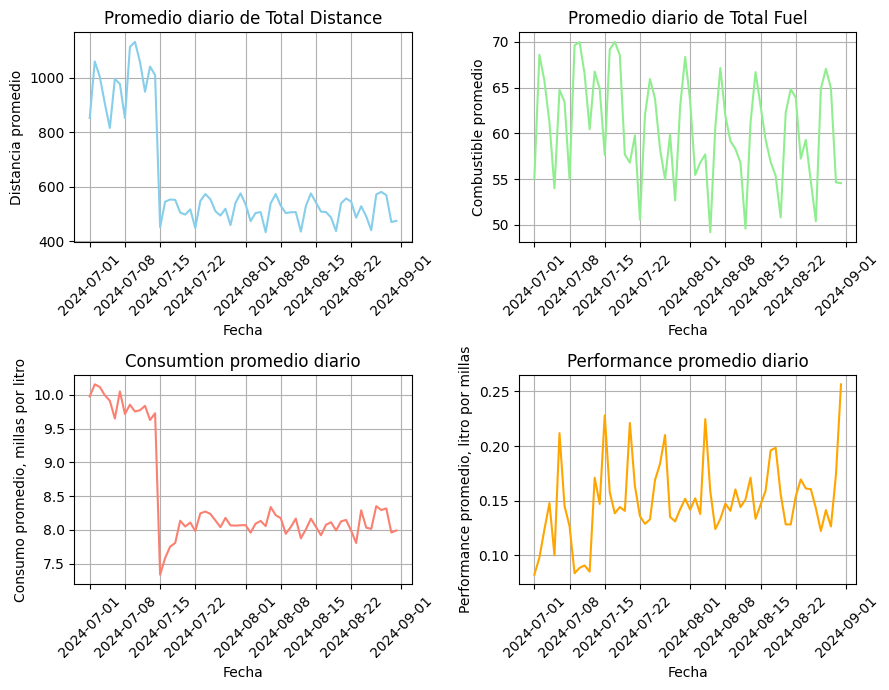

In [703]:
# Agrupar los datos por día y calcular la media diaria de todas las variables numéricas
df_consumption_daily = df_consumption_limpio.groupby(pd.to_datetime(df_consumption_limpio['date']).dt.date).agg({
    'total_distance_used_sum': 'mean',
    'total_fuel_used_sum': 'mean',
    'consumption': 'mean',
    'performance': 'mean'
})

# Crear una figura con un grid 2x2, usando el eje X como la fecha
plt.figure(figsize=(9, 7))

# Gráfico 1: total_distance_used_sum a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 1)
plt.plot(df_consumption_daily.index, df_consumption_daily['total_distance_used_sum'], color='skyblue', label='Total Distance')
plt.title('Promedio diario de Total Distance')
plt.xlabel('Fecha')
plt.ylabel('Distancia promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 2: total_fuel_used_sum a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 2)
plt.plot(df_consumption_daily.index, df_consumption_daily['total_fuel_used_sum'], color='lightgreen', label='Total Fuel Used')
plt.title('Promedio diario de Total Fuel')
plt.xlabel('Fecha')
plt.ylabel('Combustible promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 3: consumo a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 3)
plt.plot(df_consumption_daily.index, df_consumption_daily['consumption'], color='salmon', label='Consumption')
plt.title('Consumtion promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Consumo promedio, millas por litro')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 4: performance a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 4)
plt.plot(df_consumption_daily.index, df_consumption_daily['performance'], color='orange', label='Performance')
plt.title('Performance promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Performance promedio, litro por millas')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


### Correlación de datos

A continuación, se presenta la matriz de correlación. Como era de esperarse, se observa una correlación positiva y muy fuerte entre el consumo de combustible y las millas recorridas. Esto indica que, a mayor distancia recorrida, mayor es el consumo de combustible.

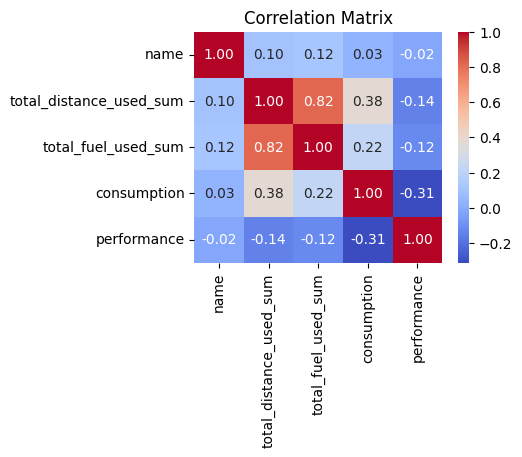

                             name  total_distance_used_sum  \
name                     1.000000                 0.097666   
total_distance_used_sum  0.097666                 1.000000   
total_fuel_used_sum      0.116622                 0.819261   
consumption              0.032615                 0.383945   
performance             -0.018390                -0.144322   

                         total_fuel_used_sum  consumption  performance  
name                                0.116622     0.032615    -0.018390  
total_distance_used_sum             0.819261     0.383945    -0.144322  
total_fuel_used_sum                 1.000000     0.221571    -0.119304  
consumption                         0.221571     1.000000    -0.312521  
performance                        -0.119304    -0.312521     1.000000  


In [704]:
import matplotlib.pyplot as plt
import seaborn as sns

def mostrar_matriz_correlacion(df_limpio, x=6, y=5):

    # Seleccionar solo las columnas numéricas
    df_limpio_num = df_limpio.select_dtypes(include=['number'])

    # Calcular la matriz de correlación
    correlation_matrix = df_limpio_num.corr()


    # Visualizar la matriz de correlación usando un heatmap
    plt.figure(figsize=(x, y))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # Imprimir la matriz de correlación
    print(correlation_matrix)

mostrar_matriz_correlacion(df_consumption_limpio, 4,3)


### Análisis de la matriz de correlación

El análisis de la matriz de correlación para las variables `total_distance_used_sum`, `total_fuel_used_sum`, `consumption` y `performance` revela los siguientes puntos clave:

1. **Correlación entre `total_distance_used_sum` y `total_fuel_used_sum` (0.819)**:
   - Existe una correlación positiva alta entre la distancia total recorrida y el combustible total utilizado. Esto es lógico, ya que al recorrer más distancia se consume más combustible. La relación es fuerte, pero no perfecta, lo que sugiere que otros factores pueden influir en el consumo de combustible.

2. **Correlación entre `total_distance_used_sum` y `consumption` (0.384)**:
   - La correlación positiva moderada indica que, aunque al recorrer mayores distancias se observa un aumento en el consumo, este incremento no es tan fuerte como la relación con el combustible total usado. Esto sugiere que el consumo de combustible no crece de manera proporcional con la distancia recorrida, posiblemente por diferencias en las condiciones de conducción o eficiencia.

3. **Correlación entre `total_fuel_used_sum` y `consumption` (0.222)**:
   - La relación es positiva pero débil. Esto implica que el consumo de combustible diario o por unidad de tiempo no está directamente relacionado con el combustible total usado, lo que podría significar que los patrones de consumo y distancia varían significativamente a lo largo del tiempo o en diferentes situaciones.

4. **Correlación entre `total_distance_used_sum` y `performance` (-0.144)**:
   - Existe una correlación negativa leve entre la distancia total recorrida y el rendimiento del vehículo. A medida que aumenta la distancia recorrida, el rendimiento tiende a disminuir ligeramente, lo que podría estar relacionado con factores como la eficiencia del motor en trayectos largos o continuos.

5. **Correlación entre `total_fuel_used_sum` y `performance` (-0.119)**:
   - La relación negativa débil sugiere que el aumento en el combustible total consumido está asociado con una pequeña disminución en el rendimiento. Esto podría reflejar una pérdida de eficiencia cuando se utiliza más combustible en condiciones no óptimas.

6. **Correlación entre `consumption` y `performance` (-0.313)**:
   - La relación negativa moderada indica que a mayor consumo de combustible, el rendimiento disminuye. Esto es consistente con la idea de que un mayor consumo suele estar asociado a condiciones de conducción menos eficientes o a un uso más intenso del vehículo.

La matriz de correlación muestra relaciones claras entre la distancia recorrida, el combustible utilizado y el consumo, mientras que el rendimiento tiene una relación inversa con estos factores. Los resultados sugieren que investigar factores adicionales que afecten el rendimiento y consumo podría ser útil para optimizar la eficiencia.

# Tabla silver_idling

In [705]:
import pandas as pd

# Ruta al archivo
file = '/content/drive/MyDrive/TECForza/silver_idling.csv'

# Leer el archivo
df_idling= pd.read_csv(file)

In [706]:
df_idling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49825 entries, 0 to 49824
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49825 non-null  object 
 1   date                  49825 non-null  object 
 2   name                  49825 non-null  object 
 3   distance              49825 non-null  float64
 4   idlingDuration        49825 non-null  object 
 5   idlingPercent         49825 non-null  float64
 6   idlingDuration_hours  49825 non-null  float64
 7   CurrentFuelPrice      49034 non-null  float64
 8   IdlingCost            49825 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.4+ MB


### Nota importante sobre los datos

- **`unique_id`**: Identificador único para cada registro.
- **`name`**: Representa un número que identifica al camión. Aunque es un valor entero, no tiene sentido aplicar estadísticas numéricas como promedios, ya que este campo representa un elemento categórico. Por lo tanto, es más apropiado utilizar análisis descriptivos.
- **`Date`**: Fecha en la que se realiza el registro. Este campo es de tipo `object`.
- **`distance`**: La distancia recorrida en la fecha correspondiente.
- **`idlingDuration`**: Tiempo en que el camión estuvo en marcha en vacío (idling), expresado en una unidad de tiempo.
- **`idlingPercent`**: Porcentaje de tiempo que el camión pasó en marcha en vacío con respecto al tiempo total de operación durante ese registro.
- **`idlingDuration_hours`**: Tiempo de marcha en vacío convertido a formato decimal (horas).
- **`CurrentFuelPrice`**: Precio del diesel al momento de cada evento.
- **`IdlingCost`**: Costo total asociado al tiempo que el camión estuvo en marcha en vacío para el registro dado.

## Visualizar los Datos Faltantes

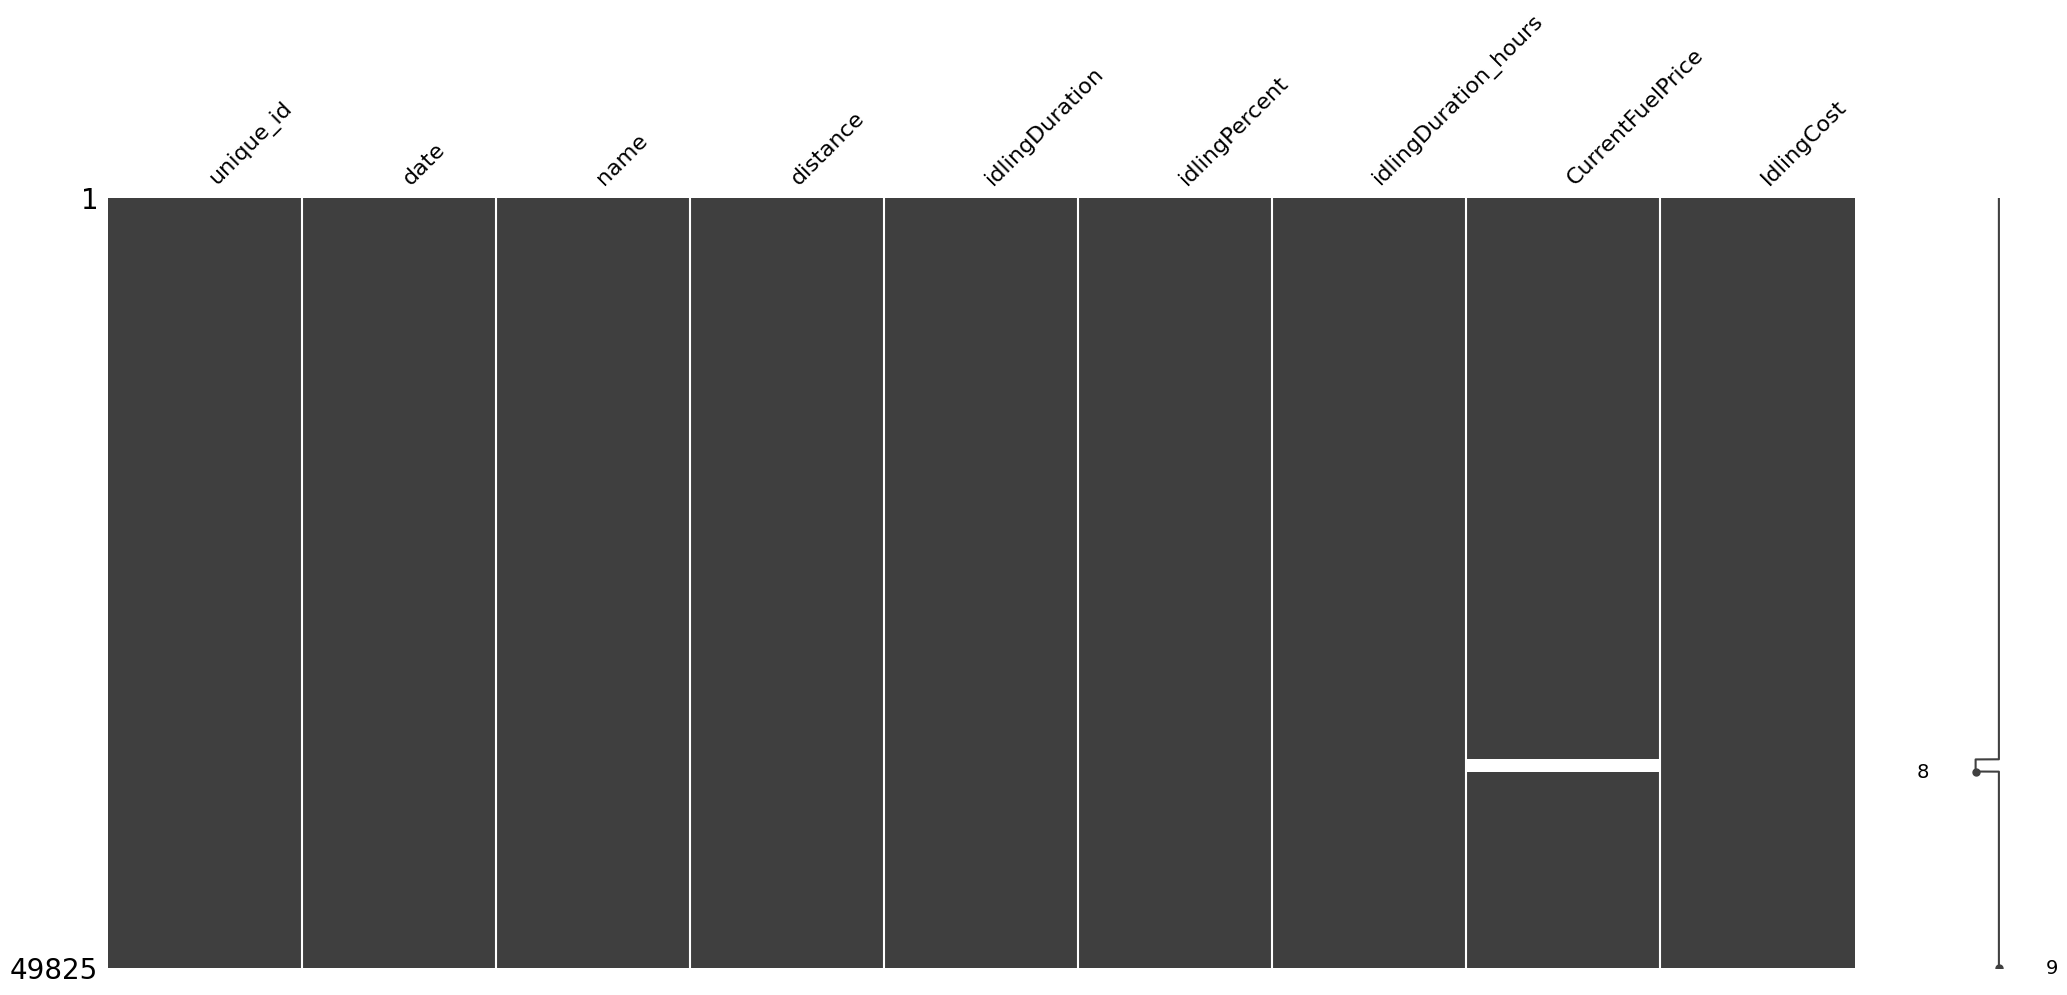

In [707]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_idling)
plt.show()

In [708]:
df_idling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49825 entries, 0 to 49824
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49825 non-null  object 
 1   date                  49825 non-null  object 
 2   name                  49825 non-null  object 
 3   distance              49825 non-null  float64
 4   idlingDuration        49825 non-null  object 
 5   idlingPercent         49825 non-null  float64
 6   idlingDuration_hours  49825 non-null  float64
 7   CurrentFuelPrice      49034 non-null  float64
 8   IdlingCost            49825 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.4+ MB


## Visualización de filas en ceros
El siguiente código realiza una copia del dataframe `df_idling` y reemplaza todos los valores cero por `NaN` utilizando la función `replace`. Esta operación es útil para tratar ceros que podrían estar representando valores faltantes en lugar de datos válidos. Luego, se utiliza la librería `missingno` para visualizar de manera gráfica la distribución de los datos faltantes dentro del nuevo dataframe `df_zero_as_nan`, permitiendo identificar patrones de ausencia de datos y analizar si estos están concentrados en columnas específicas o dispersos en todo el conjunto de datos.

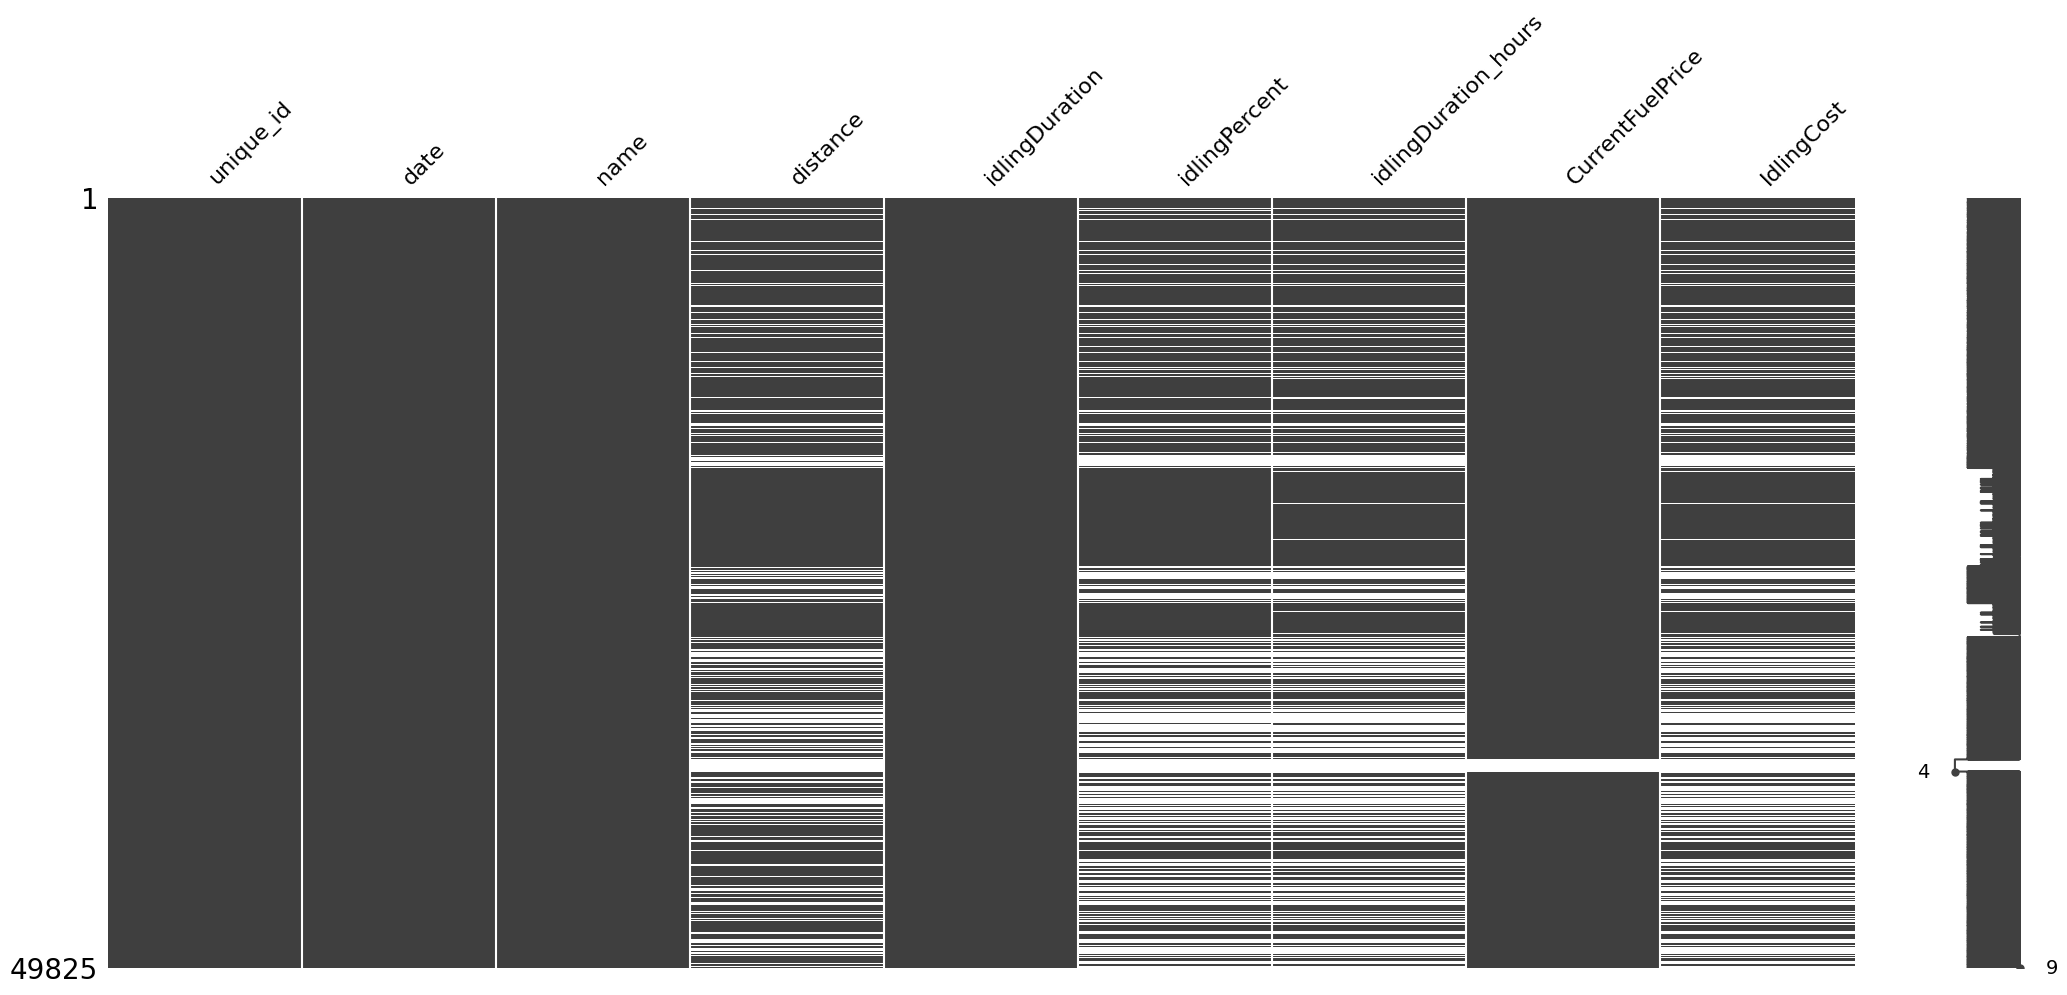

In [709]:
# Copia del dataframe para reemplazar ceros por NaN
df_zero_as_nan = df_idling.replace(0, np.nan)

# Visualizar la falta de datos y los ceros
msno.matrix(df_zero_as_nan)
plt.show()


Al analizar la visualización de los datos faltantes, parece que los ceros, ahora reemplazados por `NaN`, están concentrados en las mismas filas. Este patrón sugiere que ciertos registros en el dataframe presentan múltiples valores faltantes de manera simultánea. Esta concentración podría indicar que en algunas observaciones, los datos no fueron recolectados de forma completa, lo que podría estar relacionado con condiciones particulares, como errores en la captura de datos o situaciones específicas en las que la información no estaba disponible. Este comportamiento merece un análisis más detallado para determinar su causa y cómo manejarlo adecuadamente en el análisis posterior.

In [710]:
verificar_datos(df_idling)

Número de filas duplicadas: 136

Valores faltantes por columna:
unique_id                 0
date                      0
name                      0
distance                  0
idlingDuration            0
idlingPercent             0
idlingDuration_hours      0
CurrentFuelPrice        791
IdlingCost                0
dtype: int64

Número de filas con al menos un valor en cero: 17002

Valores en cero por columna:
unique_id                   0
date                        0
name                        0
distance                11893
idlingDuration              0
idlingPercent           16477
idlingDuration_hours    16897
CurrentFuelPrice            0
IdlingCost              16897
dtype: int64


## ¿Existen valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

Sí, existen valores faltantes en el conjunto de datos, particularmente en la columna **`CurrentFuelPrice`**, que tiene **791 valores nulos**. Esta columna es fundamental para el análisis de costos de inactividad, y la falta de estos datos puede comprometer la precisión de los cálculos relacionados con el consumo de combustible.

Además, se detectan patrones de ausencia vinculados a los valores en cero. **17,002 filas contienen al menos un valor en cero**, afectando principalmente las columnas **`distance`**, **`idlingPercent`**, **`idlingDuration_hours`**, y **`IdlingCost`**. La gran cantidad de ceros en estas columnas clave podría ser indicativa de errores en la captura de datos o de condiciones específicas que requieren una revisión detallada.

Particularmente preocupante es la columna **`distance`**, que cuenta con **11,893 valores en cero**. Esto resulta crítico dado que la distancia recorrida es esencial para evaluar el rendimiento y la eficiencia de los vehículos. La falta de datos en esta variable también puede estar afectando los cálculos de **`idlingPercent`** y **`IdlingCost`**, ya que ambas dependen de la información de distancia recorrida y otros parámetros operacionales.

En resumen, los patrones de ausencia están relacionados tanto con los valores nulos como con los ceros en columnas clave para el análisis. Es necesario aplicar estrategias de tratamiento de estos datos, como la imputación o eliminación de filas, antes de proceder con el análisis de rendimiento y costos.











Se ha decidido eliminar todas las columnas que no contienen ningún valor, así como aquellas que solo presentan valores cero. Esta medida busca simplificar el conjunto de datos y asegurar que se mantengan únicamente las columnas que aportan información útil para el análisis.

In [711]:
df_idling.dropna(axis=1, how='all', inplace=True)

In [712]:
def eliminar_columnas_con_solo_ceros(df):
    # Identificar columnas con solo valores 0
    columnas_con_solo_ceros = df.columns[(df == 0).all()]

    # Eliminar las columnas del DataFrame
    df.drop(columns=columnas_con_solo_ceros, inplace=True)

    # Mostrar las columnas eliminadas
    print("Columnas eliminadas:", columnas_con_solo_ceros.tolist())

    # Mostrar las columnas restantes para verificar
    print("Columnas restantes:", df.columns.tolist())


eliminar_columnas_con_solo_ceros(df_idling)

Columnas eliminadas: []
Columnas restantes: ['unique_id', 'date', 'name', 'distance', 'idlingDuration', 'idlingPercent', 'idlingDuration_hours', 'CurrentFuelPrice', 'IdlingCost']


Vamos a validar y eliminar las columnas que tengan un idlingCost en cero, ya que no aportan a nuestro análisis

In [713]:
# Eliminar filas donde total_distance_used_sum o total_fuel_used_sum sean igual a cero
df_idling_limpio = df_idling[
    (df_idling['IdlingCost'] != 0)
]

# Eliminar filas con valores nulos
df_idling_limpio = df_idling_limpio.dropna()

# Mostrar el nuevo dataframe limpio
print(df_idling_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32928 entries, 0 to 49822
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             32928 non-null  object 
 1   date                  32928 non-null  object 
 2   name                  32928 non-null  object 
 3   distance              32928 non-null  float64
 4   idlingDuration        32928 non-null  object 
 5   idlingPercent         32928 non-null  float64
 6   idlingDuration_hours  32928 non-null  float64
 7   CurrentFuelPrice      32928 non-null  float64
 8   IdlingCost            32928 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.5+ MB
None


In [714]:
df_idling_limpio.head(5)

,unique_id,date,name,distance,idlingDuration,idlingPercent,idlingDuration_hours,CurrentFuelPrice,IdlingCost
0,e1b2b4fa-1533-4745-a280-53be708f986c,2024-07-01,1000,82.230765,05:02:01,49.0,5.03,3.813,19.18
2,a4b72a58-c75c-430f-bfe2-1f2a9cc990bb,2024-07-01,1002,433.584047,03:50:15,34.0,3.84,3.813,14.64
3,9e39272b-4c52-4eec-a712-4244afbb0594,2024-07-01,1003,818.292542,12:02:58,53.0,12.05,3.813,45.95
4,57984b5f-be43-4971-9ee8-e9c3c4cfc344,2024-07-01,1004,540.733262,01:28:24,14.0,1.47,3.813,5.61
5,06cfbeca-1d81-439a-8b46-15a7649c76a0,2024-07-01,1005,202.412740,02:20:36,31.0,2.34,3.813,8.92


Ommitiremos el valor de la columna idlingDuration, ya que es el mismo valor de la columna idlingDuration_hours, solo que sin convertirlo a dato numérico.

In [715]:
# Lista de variables categóricas
variables_categoricas = ['name', 'date', 'unique_id']

# Lista de variables numéricas
variables_numericas = ['distance', 'idlingDuration_hours', 'CurrentFuelPrice', 'IdlingCost']

### Variables numéricas

In [716]:
# Obtener estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(df_idling_limpio[variables_numericas].describe())

Estadísticas descriptivas de las variables numéricas:
           distance  idlingDuration_hours  CurrentFuelPrice    IdlingCost
count  32928.000000          32928.000000      32928.000000  32928.000000
mean     406.431405              5.207511          3.775911     19.790860
std      309.916428              5.565356          0.060903     21.163097
min        0.000086              0.010000          3.651000      0.040000
25%      149.643358              0.670000          3.755000      2.510000
50%      372.163791              2.710000          3.768000     10.250000
75%      608.315891              9.690000          3.813000     36.910000
max     1758.667149             23.960000          3.865000     92.370000


### Análisis de las estadísticas descriptivas de las variables numéricas

El análisis de las estadísticas descriptivas para las variables numéricas proporciona una visión general de la distribución de los datos relacionados con la distancia, la duración en marcha en vacío (idling), el precio del combustible y el costo de idling. A continuación se destacan los principales puntos:

1. **`distance` (Distancia recorrida)**:
   - **Media**: 406.43 unidades, lo que indica que en promedio, los camiones recorren esta distancia.
   - **Desviación estándar**: 309.92, lo que refleja una variabilidad significativa en las distancias recorridas, con algunos registros que están considerablemente alejados del promedio.
   - **Mínimo**: Prácticamente 0, lo que sugiere que algunos registros muestran trayectos extremadamente cortos o nulos.
   - **Percentil 50% (Mediana)**: 372.16, lo que sugiere que la mitad de los registros tiene distancias menores a este valor.
   - **Máximo**: 1758.67, indicando que algunos camiones recorrieron distancias muy largas.

2. **`idlingDuration_hours` (Horas de marcha en vacío)**:
   - **Media**: 5.21 horas, lo que indica que, en promedio, los camiones estuvieron en marcha en vacío durante poco más de 5 horas por registro.
   - **Desviación estándar**: 5.57, reflejando una gran variabilidad en el tiempo de idling.
   - **Mínimo**: 0.01 horas, lo que sugiere que algunos registros casi no muestran tiempo de idling.
   - **Percentil 50% (Mediana)**: 2.71 horas, lo que sugiere que en al menos la mitad de los casos el tiempo de marcha en vacío fue menor que este valor.
   - **Máximo**: 23.96 horas, lo que sugiere que en algunos casos los camiones estuvieron casi un día entero en idling.
   - El tener un valor muy cercano a cero en la variable **`idlingDuration_hours`** e **`IdlingCost`** indica que ha habido momentos donde el idling es mínimo para la unidad.

3. **`CurrentFuelPrice` (Precio del combustible actual)**:
   - **Media**: 3.78, con una **desviación estándar** pequeña (0.06), lo que indica que el precio del combustible fue relativamente estable durante el periodo de tiempo analizado.
   - **Mínimo**: 3.651 y **Máximo**: 3.865, lo que confirma que no hubo fluctuaciones significativas en el precio del combustible durante estos dos meses. Es importante identificar si hubo un pico de aumento o si existe alguna tendencia en el precio del diésel a lo largo del tiempo.

4. **`IdlingCost` (Costo del tiempo en marcha en vacío)**:
   - **Media**: 19.79, lo que indica que el costo promedio por el tiempo en marcha en vacío es de casi 20 unidades monetarias por registro.
   - **Desviación estándar**: 21.16, lo que sugiere una alta variabilidad en los costos asociados al idling.
   - **Mínimo**: 0.04, lo que sugiere que en algunos casos el costo fue casi insignificante.
   - **Percentil 50% (Mediana)**: 10.25, lo que indica que la mitad de los registros incurrieron en costos de idling menores a este valor.
   - **Máximo**: 92.37, lo que muestra que en algunos registros el costo del idling fue muy elevado.

### Resumen:
- Las variables `distance` e `idlingDuration_hours` presentan una gran variabilidad, con algunos valores extremos que influyen en los promedios.
- El precio del combustible (`CurrentFuelPrice`) es bastante estable, aunque su rango entre 3.651 y 3.865 sugiere que es importante observar si hubo picos de aumento o una tendencia en estos precios durante el período analizado.
- El costo de idling (`IdlingCost`) muestra una gran dispersión, indicando que el impacto del tiempo de marcha en vacío varía considerablemente según el registro.

Este análisis destaca la importancia de gestionar el tiempo de marcha en vacío y monitorear el precio del combustible, ya que ambos pueden tener un impacto considerable en los costos operativos.

### Variables Categóricas

In [717]:
for column in variables_categoricas:
    print(f"Estadísticas de la variable categórica: {column}")
    print("Frecuencia de valores:")
    print(df_idling_limpio[column].value_counts())  # Frecuencia de cada valor
    print(f"Cantidad de valores únicos: {df_idling[column].nunique()}")  # Número de valores únicos
    print(f"Valor más frecuente: {df_idling_limpio[column].mode()[0]}")  # Valor más común
    print("\n")

Estadísticas de la variable categórica: name
Frecuencia de valores:
name
561     136
655     109
1158     58
832      57
689      56
       ... 
580       1
839       1
1343      1
1340      1
1297      1
Name: count, Length: 875, dtype: int64
Cantidad de valores únicos: 916
Valor más frecuente: 561


Estadísticas de la variable categórica: date
Frecuencia de valores:
date
2024-07-24    1406
2024-07-25    1400
2024-07-26    1338
2024-07-27    1176
2024-07-02     739
2024-07-01     739
2024-07-03     724
2024-07-10     724
2024-07-11     720
2024-07-18     712
2024-07-09     711
2024-07-31     705
2024-07-22     703
2024-07-08     700
2024-07-23     700
2024-07-12     698
2024-07-16     698
2024-08-01     697
2024-07-30     696
2024-07-05     695
2024-07-29     690
2024-07-15     686
2024-07-04     678
2024-07-20     660
2024-07-06     651
2024-07-13     650
2024-07-21     604
2024-07-14     598
2024-07-07     578
2024-08-28     464
2024-08-29     459
2024-08-27     451
2024-08-30     4

In [718]:
df_idling_limpio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,32928,32808,c7cc0f6f-d1a8-4e45-bea4-c0fd254c7626,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,32928,58,2024-07-24,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,32928,875,561,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,32928.0,NaN,NaN,NaN,406.431405,309.916428,0.000086,149.643358,372.163791,608.315891,1758.667149
idlingDuration,32928,19227,00:03:18,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idlingPercent,32928.0,NaN,NaN,NaN,36.599308,25.671295,0.0,14.0,32.0,55.0,100.0
idlingDuration_hours,32928.0,NaN,NaN,NaN,5.207511,5.565356,0.01,0.67,2.71,9.69,23.96
CurrentFuelPrice,32928.0,NaN,NaN,NaN,3.775911,0.060903,3.651,3.755,3.768,3.813,3.865
IdlingCost,32928.0,NaN,NaN,NaN,19.79086,21.163097,0.04,2.51,10.25,36.91,92.37


- La columna `unique_id` confirma que casi todos los registros tienen un identificador único.
- En cuanto a la variable `distance`, existe una gran variabilidad en las distancias recorridas por los camiones.
- El tiempo en marcha en vacío (`idlingDuration`) y su porcentaje (`idlingPercent`) muestran una amplia dispersión, lo que implica diferentes niveles de ineficiencia entre los vehículos.
- El precio del combustible fue bastante estable, con un rango entre 3.651 y 3.865.
- El costo asociado al idling tiene una gran dispersión, con algunos registros mostrando costos considerablemente altos.

Al igual que con la tabla de `consumption`, es importante evaluar si en futuros análisis es necesario mantener los camiones que solo tienen un registro o si sería más adecuado eliminar estos casos. La decisión dependerá de si estos registros aportan valor al análisis o si su eliminación mejoraría la coherencia de los datos.

Asimismo, es fundamental investigar los valores duplicados en la columna `unique_id`. Estos casos podrían indicar registros duplicados o que la tarea de recolección de datos se haya ejecutado más de una vez en los mismos días. Es crucial resolver esta situación para evitar sesgos y garantizar la integridad de los datos.

In [719]:
# Calcular la cardinalidad de las variables categóricas
cardinalidad_name = df_idling_limpio['name'].nunique()
cardinalidad_date = df_idling_limpio['date'].nunique()

# Crear un diccionario con las cardinalidades
cardinalidad_categoricas = {
    'name': cardinalidad_name,
    'date': cardinalidad_date
}

cardinalidad_categoricas

{'name': 875, 'date': 58}

- **`name`: 875 valores únicos**. Esto significa que hay 875 camiones distintos registrados en la base de datos. Dado el número elevado de vehículos, parece que los datos cubren una flota bastante grande.

- **`date`: 58 valores únicos**. Esto sugiere que los registros cubren un total de 58 fechas diferentes, lo que puede representar un período de aproximadamente dos meses (dependiendo de la frecuencia de los registros).

In [720]:
# Uso de la función
convertir_fecha(df_idling_limpio, 'date')

Valores con formato incorrecto:
Series([], Name: date, dtype: object)
La columna 'date' ha sido convertida a datetime correctamente.
count                            32928
mean     2024-07-26 18:24:39.883382016
min                2024-07-01 00:00:00
25%                2024-07-12 00:00:00
50%                2024-07-25 00:00:00
75%                2024-08-07 00:00:00
max                2024-08-31 00:00:00
Name: date, dtype: object
datetime64[ns]


- **Abertura Temporal**: El rango de fechas va del 1 de julio al 31 de agosto de 2024, lo que proporciona una visión completa de dos meses de actividad, lo que es útil para detectar tendencias estacionales o cambios en el comportamiento.

- **Concentración de Datos**: La media y la mediana sugieren que la mayoría de los registros se concentran hacia finales de julio, lo que puede reflejar un período de actividad intensa.

## Distribución de las variables numéricas

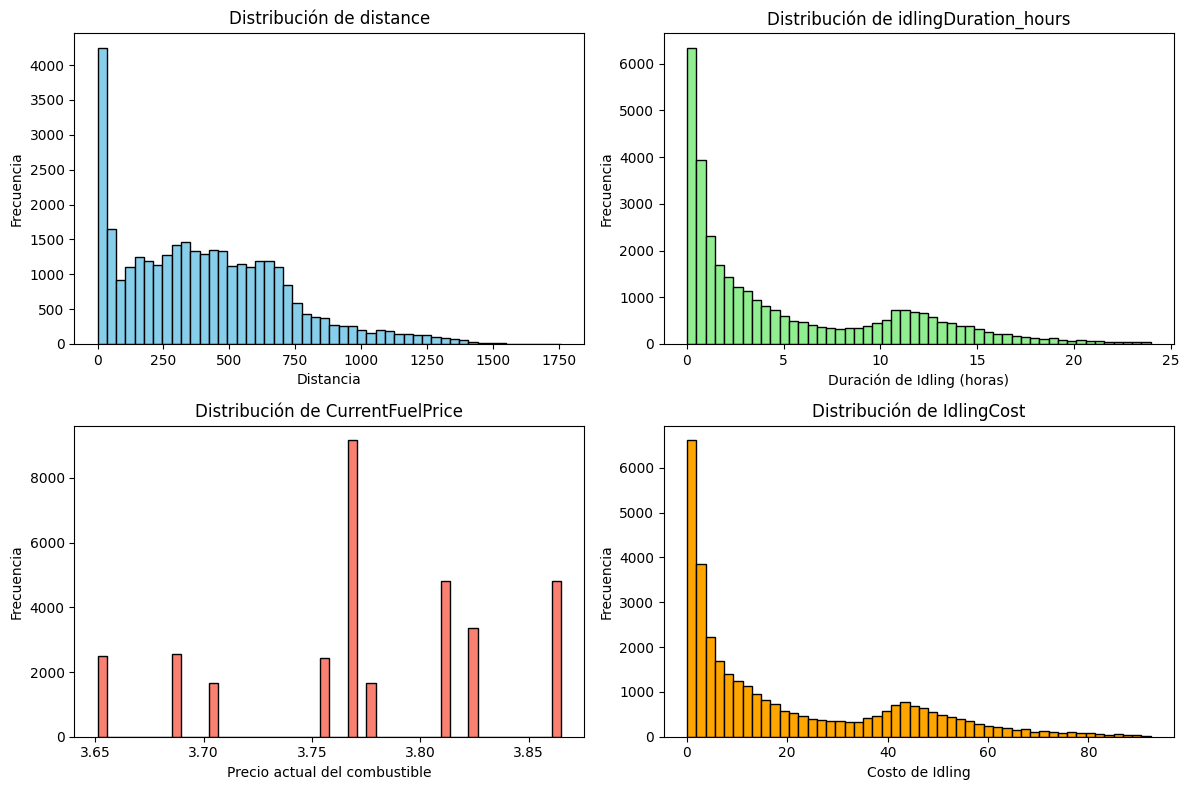

In [721]:
# Crear una figura con un grid de 2x2 para las distribuciones de las cuatro variables numéricas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Subplot 1: distance
plt.subplot(2, 2, 1)
plt.hist(df_idling_limpio['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de distance')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Subplot 2: idlingDuration_hours
plt.subplot(2, 2, 2)
plt.hist(df_idling_limpio['idlingDuration_hours'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de idlingDuration_hours')
plt.xlabel('Duración de Idling (horas)')
plt.ylabel('Frecuencia')

# Subplot 3: CurrentFuelPrice
plt.subplot(2, 2, 3)
plt.hist(df_idling_limpio['CurrentFuelPrice'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribución de CurrentFuelPrice')
plt.xlabel('Precio actual del combustible')
plt.ylabel('Frecuencia')

# Subplot 4: IdlingCost
plt.subplot(2, 2, 4)
plt.hist(df_idling_limpio['IdlingCost'], bins=50, color='orange', edgecolor='black')
plt.title('Distribución de IdlingCost')
plt.xlabel('Costo de Idling')
plt.ylabel('Frecuencia')

# Ajustar los subplots
plt.tight_layout()
plt.show()


Se observa que la distribución de los datos presenta una gran concentración de valores cercanos a cero. Esto sugiere que estos valores pequeños podrían estar alterando la distribución normal de los datos. Antes de llevar a cabo cualquier transformación, es crucial que se identifiquen y eliminen estos outliers para asegurar un análisis más preciso.

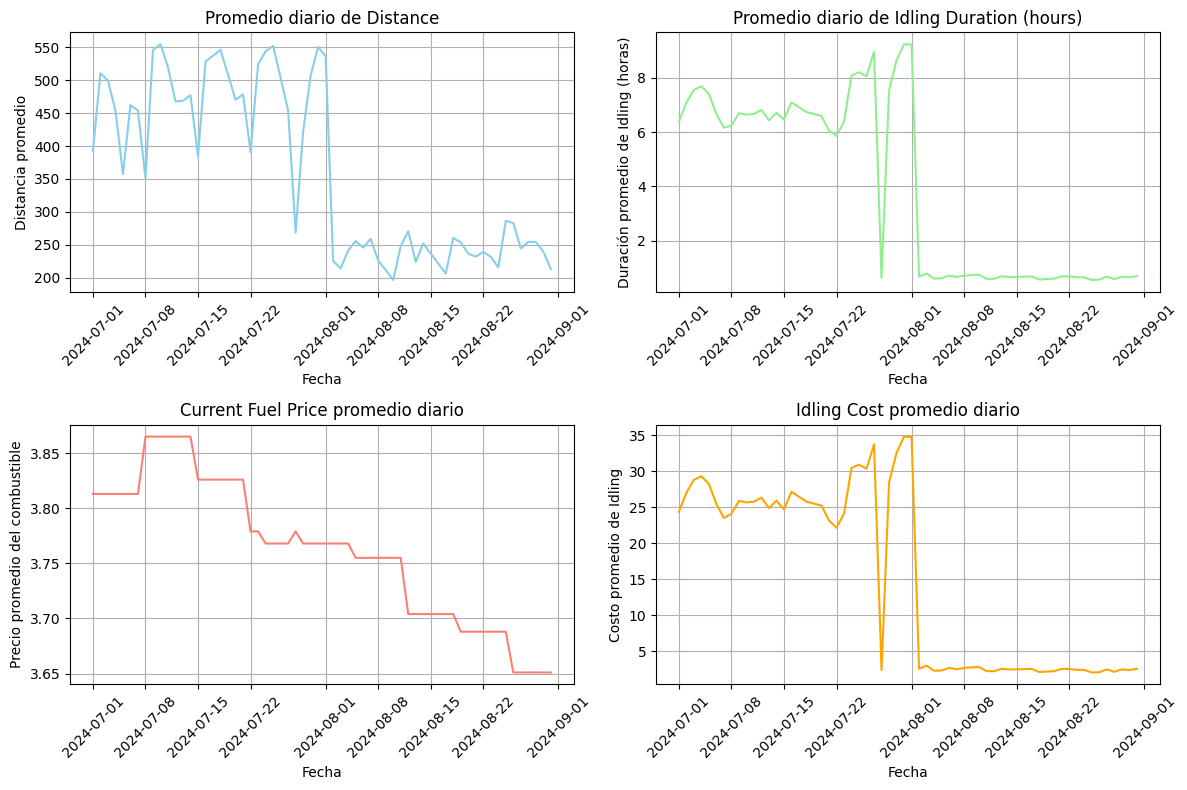

In [722]:

# Agrupar los datos por día y calcular la media diaria de todas las variables numéricas
df_idling_daily = df_idling_limpio.groupby(pd.to_datetime(df_idling_limpio['date']).dt.date).agg({
    'distance': 'mean',
    'idlingDuration_hours': 'mean',
    'CurrentFuelPrice': 'mean',
    'IdlingCost': 'mean'
})

# Crear una figura con un grid 2x2, usando el eje X como la fecha
plt.figure(figsize=(12, 8))

# Gráfico 1: distance a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 1)
plt.plot(df_idling_daily.index, df_idling_daily['distance'], color='skyblue', label='Distance')
plt.title('Promedio diario de Distance')
plt.xlabel('Fecha')
plt.ylabel('Distancia promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 2: idlingDuration_hours a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 2)
plt.plot(df_idling_daily.index, df_idling_daily['idlingDuration_hours'], color='lightgreen', label='Idling Duration (hours)')
plt.title('Promedio diario de Idling Duration (hours)')
plt.xlabel('Fecha')
plt.ylabel('Duración promedio de Idling (horas)')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 3: CurrentFuelPrice a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 3)
plt.plot(df_idling_daily.index, df_idling_daily['CurrentFuelPrice'], color='salmon', label='Current Fuel Price')
plt.title('Current Fuel Price promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio del combustible')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 4: IdlingCost a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 4)
plt.plot(df_idling_daily.index, df_idling_daily['IdlingCost'], color='orange', label='Idling Cost')
plt.title('Idling Cost promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio de Idling')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Matriz de Correlación

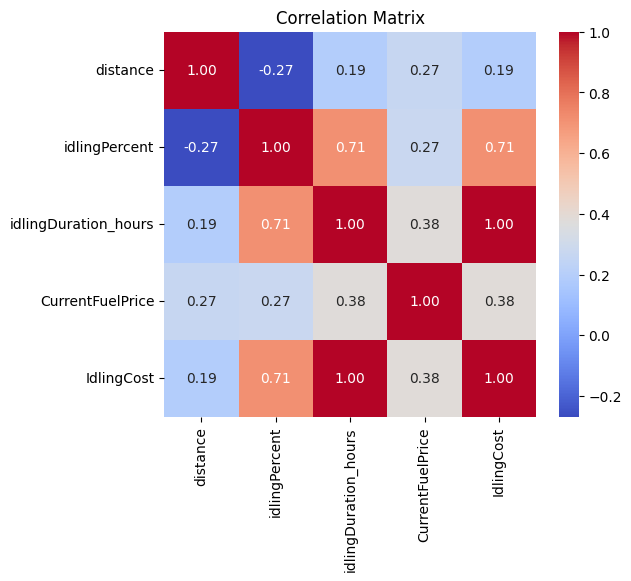

                      distance  idlingPercent  idlingDuration_hours  \
distance              1.000000      -0.268704              0.188616   
idlingPercent        -0.268704       1.000000              0.710928   
idlingDuration_hours  0.188616       0.710928              1.000000   
CurrentFuelPrice      0.265636       0.274063              0.376671   
IdlingCost            0.188856       0.711017              0.999910   

                      CurrentFuelPrice  IdlingCost  
distance                      0.265636    0.188856  
idlingPercent                 0.274063    0.711017  
idlingDuration_hours          0.376671    0.999910  
CurrentFuelPrice              1.000000    0.383508  
IdlingCost                    0.383508    1.000000  


In [723]:
mostrar_matriz_correlacion(df_idling_limpio)


1. **Correlación entre `distance` y `idlingDuration_hours`**:
   - La correlación es de **0.188616**, lo que sugiere una relación positiva débil. Esto indica que a medida que aumenta la distancia recorrida, también puede haber un ligero incremento en el tiempo de inactividad.

2. **Correlación entre `idlingDuration_hours` y `IdlingCost`**:
   - Se observa una correlación extremadamente alta de **0.999910**, lo que implica que prácticamente hay una relación directa entre el tiempo de inactividad y el costo asociado al idling. Esto sugiere que a mayor tiempo de inactividad, el costo correspondiente se incrementa de manera casi proporcional.

3. **Correlación entre `CurrentFuelPrice` y `idlingDuration_hours`**:
   - La correlación es de **0.376671**, indicando una relación positiva moderada. Esto puede implicar que a medida que aumenta el precio del combustible, también tiende a haber un aumento en el tiempo de inactividad.

4. **Correlación entre `distance` y `CurrentFuelPrice`**:
   - La correlación de **0.265636** sugiere una relación positiva débil, indicando que a mayor distancia recorrida, el precio del combustible también tiende a ser más alto.

5. **Correlación entre `IdlingCost` y otras variables**:
   - La correlación con `distance` es de **0.188856**, que también indica una relación positiva débil. Sin embargo, la correlación con `CurrentFuelPrice` es de **0.383508**, sugiriendo que el costo del idling tiene una relación moderada con el precio del combustible.

#### Conclusiones:

- La matriz de correlación proporciona información clave sobre las relaciones entre las variables analizadas. La relación extremadamente alta entre `idlingDuration_hours` y `IdlingCost` resalta la importancia de reducir el tiempo de inactividad para minimizar costos.
- Las correlaciones positivas, aunque algunas sean débiles, pueden ser un punto de partida para un análisis más profundo y para desarrollar estrategias que optimicen el uso de los camiones y el costo del combustible.
- Es fundamental tener en cuenta que la correlación no implica causalidad; se deben considerar otros factores y análisis adicionales para entender completamente las dinámicas entre estas variables.

# Tabla bronze_safety

In [724]:
# Ruta al archivo
file = '/content/drive/MyDrive/TECForza/bronze_safety.csv'

# Leer el archivo
df_safety= pd.read_csv(file)

<ipython-input-724-2acc9f37f101>:5: DtypeWarning: Columns (21,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_safety= pd.read_csv(file)


In [725]:
df_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84828 entries, 0 to 84827
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DeviceName                            84827 non-null  object 
 1   DeviceId                              84828 non-null  object 
 2   DeviceComment                         20938 non-null  object 
 3   DeviceGroup                           84828 non-null  object 
 4   DeviceGroup|Company Group             84828 non-null  object 
 5   UserFirstName                         0 non-null      float64
 6   UserLastName                          0 non-null      float64
 7   UserName                              0 non-null      float64
 8   UserId                                0 non-null      float64
 9   UserComment                           0 non-null      float64
 10  DriverGroup                           0 non-null      float64
 11  GroupName      

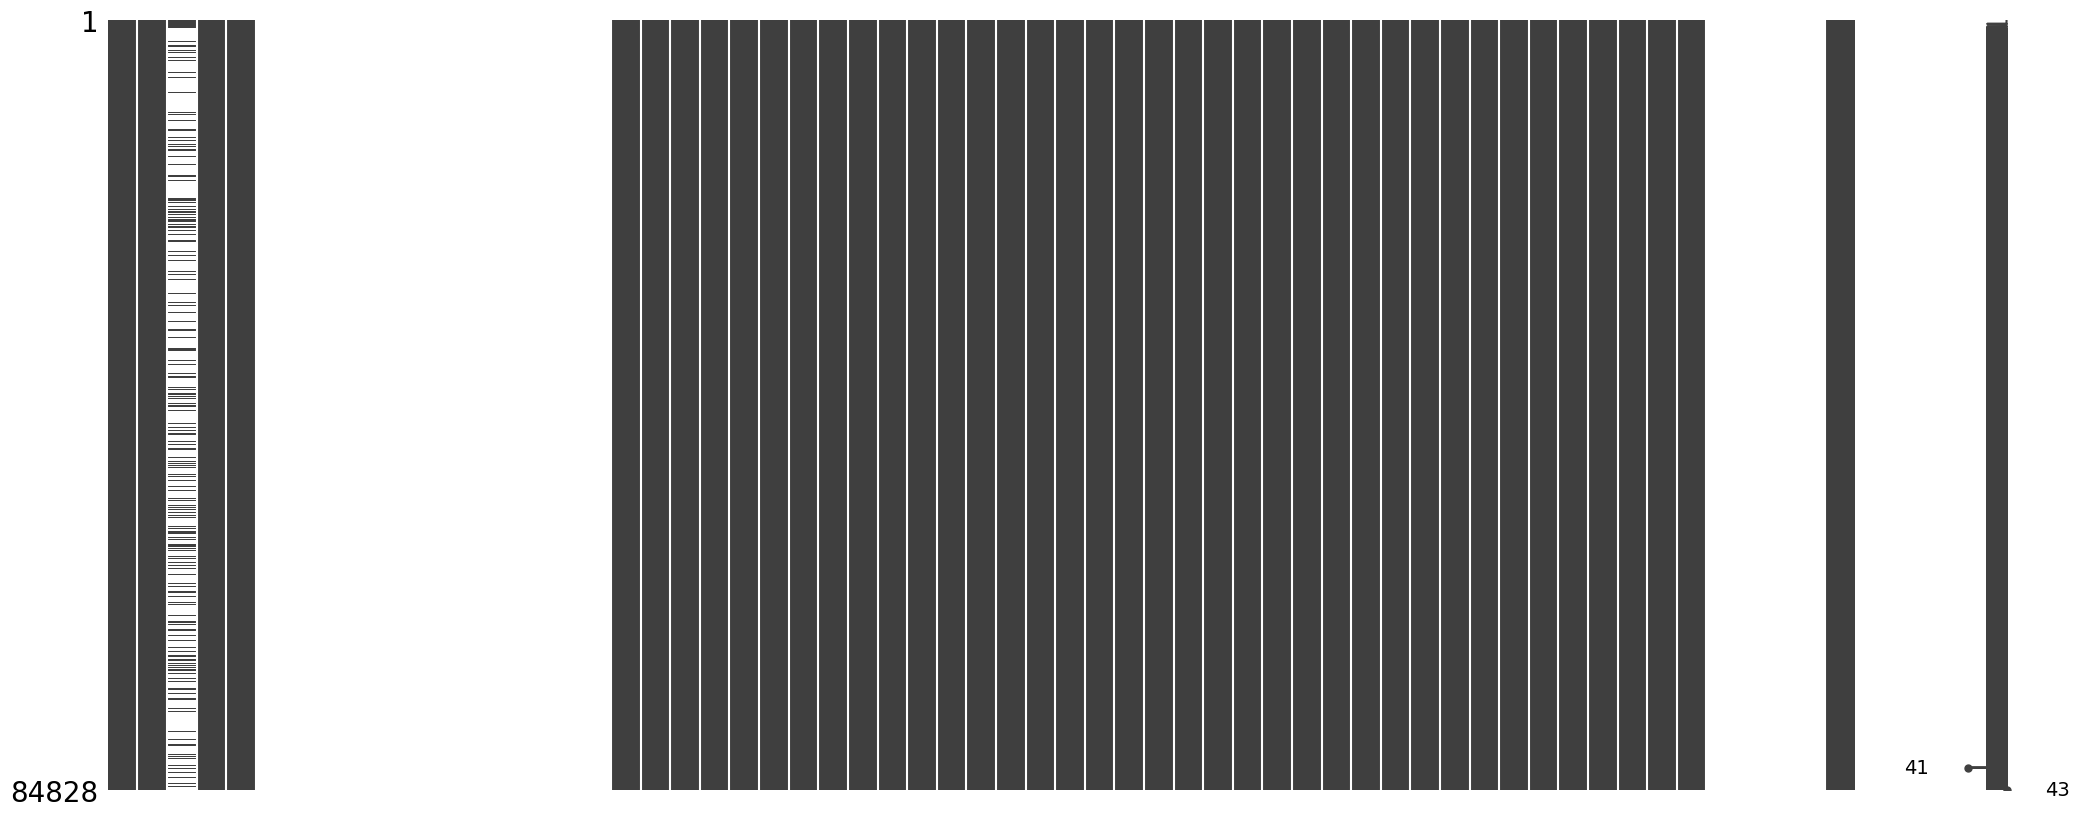

In [726]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_safety)
plt.show()

### Visualizar Valores en Cero

En este proceso, hemos creado una copia del DataFrame `df_safety` llamada `df_zero_as_nan`, en la cual todos los valores iguales a 0 han sido reemplazados por `NaN`.

Reemplazar ceros por `NaN` nos permite:
1. **Identificar errores o inconsistencias**: Los ceros pueden ser indicadores de datos erróneos o incompletos.
2. **Evitar problemas en análisis posteriores**: Al tratar los ceros como valores faltantes, podemos manejar estos casos con imputaciones, eliminación de filas, o realizar análisis más precisos.
3. **Visualizar mejor la magnitud de los datos faltantes**: Convertir los ceros a `NaN` nos ayuda a visualizar de manera más clara las posiciones donde se deben tomar decisiones respecto al manejo de los datos ausentes.

A continuación, se utiliza la función `msno.matrix()` para visualizar los datos faltantes en `df_zero_as_nan`. El gráfico muestra en color oscuro las posiciones donde los valores faltantes (incluidos los ceros convertidos a `NaN`) están presentes. Esto facilita la identificación de patrones y nos permite tomar decisiones sobre cómo tratar los valores nulos.

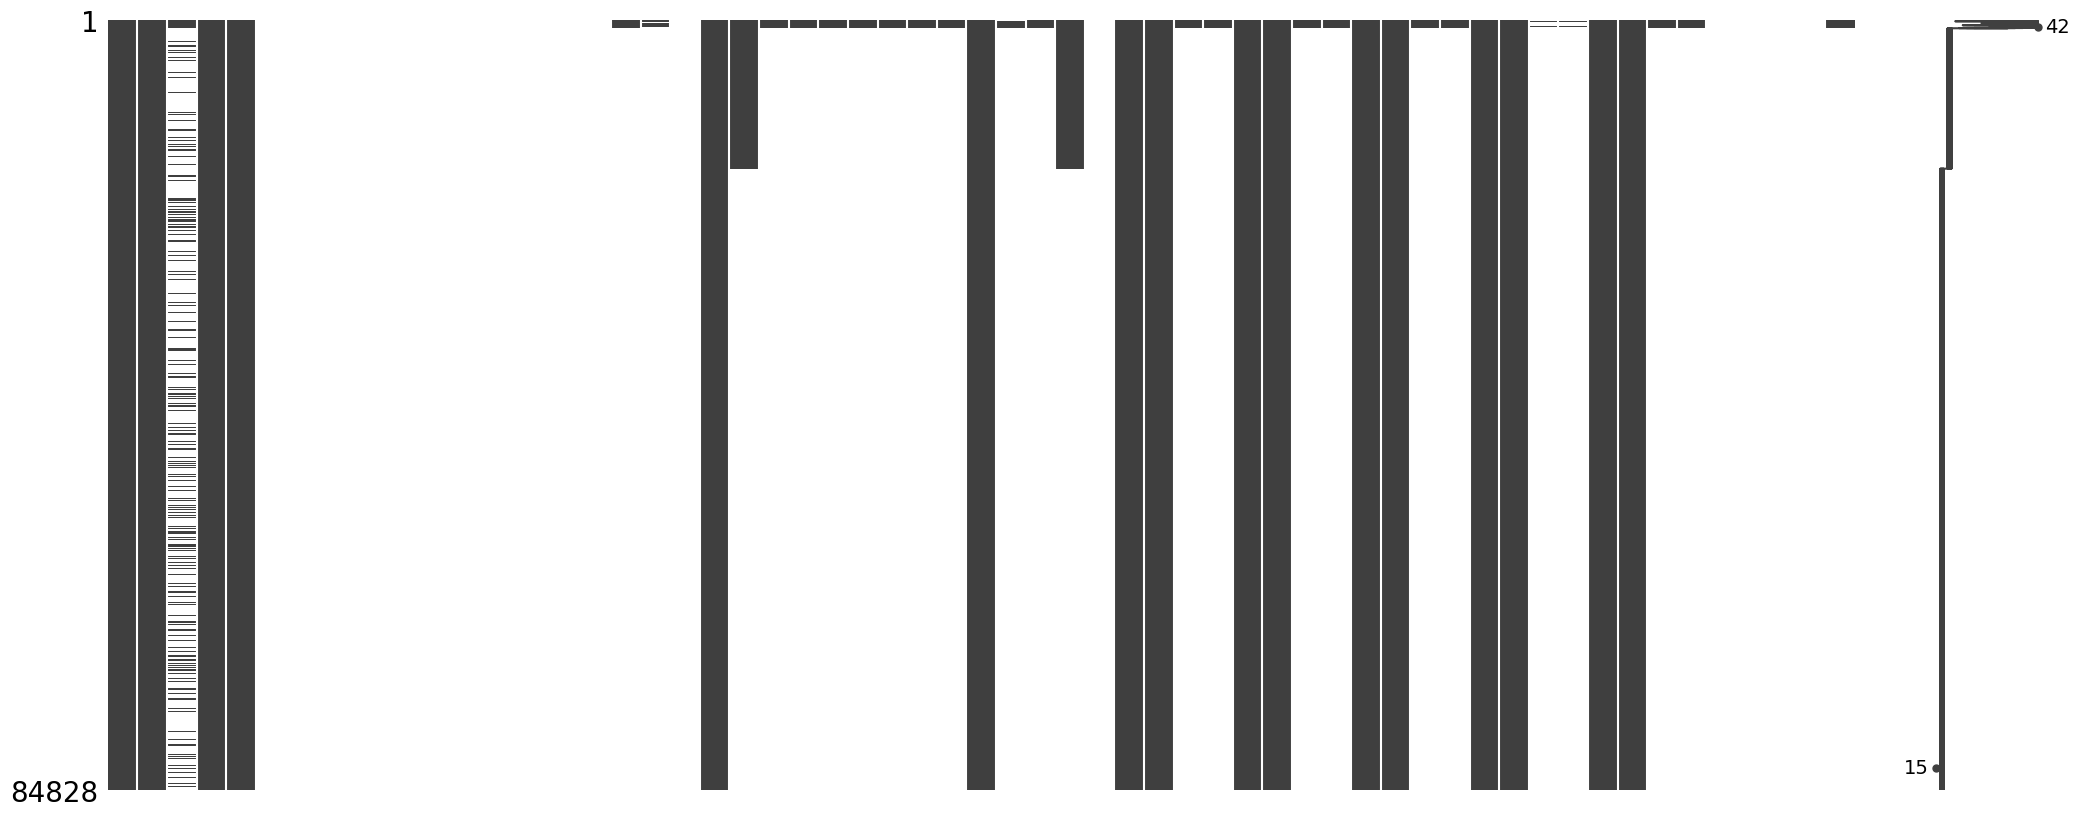

In [727]:
# Copia del dataframe para reemplazar ceros por NaN
df_zero_as_nan = df_safety.replace(0, np.nan)

# Visualizar la falta de datos y los ceros
msno.matrix(df_zero_as_nan)
plt.show()

¿Existen valores faltantes en el conjunto de datos? ¿Es posible identificar patrones de ausencia?

Sí, hay columnas en el conjunto de datos que están completamente vacías, y la columna 'DeviceComment' presenta una cantidad significativa de valores faltantes.

Se ha decidido eliminar todas las columnas que no contienen ningún valor, así como aquellas que solo presentan valores cero. Esta medida busca simplificar el conjunto de datos y asegurar que se mantengan únicamente las columnas que aportan información útil para el análisis.

In [728]:
df_safety.dropna(axis=1, how='all', inplace=True)

### Función eliminar_columnas_con_solo_ceros

La función eliminar_columnas_con_solo_ceros() tiene como propósito limpiar el DataFrame eliminando las columnas que no aportan información útil, ya que contienen exclusivamente valores de cero. Esto optimiza el análisis al eliminar datos irrelevantes, reduciendo la dimensionalidad del conjunto de datos.

In [729]:
def eliminar_columnas_con_solo_ceros(df):
    # Identificar columnas con solo valores 0
    columnas_con_solo_ceros = df.columns[(df == 0).all()]

    # Eliminar las columnas del DataFrame
    df.drop(columns=columnas_con_solo_ceros, inplace=True)

    # Mostrar las columnas eliminadas
    print("Columnas eliminadas:", columnas_con_solo_ceros.tolist())

    # Mostrar las columnas restantes para verificar
    print("Columnas restantes:", df.columns.tolist())


eliminar_columnas_con_solo_ceros(df_safety)

Columnas eliminadas: ['RiskManagementAux1']
Columnas restantes: ['DeviceName', 'DeviceId', 'DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group', 'RiskManagementSpeedLimit1Count', 'RiskManagementSpeedLimit2Count', 'RiskManagementSpeedLimit3Count', 'RiskManagementTotalDrivingDuration', 'RiskManagementAverageSpeed', 'RiskManagementStopUnder10Count', 'RiskManagementStopOver10Count', 'RiskManagementStopOver20Count', 'RiskManagementStopOver30Count', 'RiskManagementStopOver40Count', 'RiskManagementStopOver50Count', 'RiskManagementIdlingOver5Count', 'RiskManagementIdlingDuration', 'RiskManagementAfterHoursTripCount', 'RiskManagementTotalDistance', 'RiskManagementTotalStopsCount', 'RiskManagementExceptionRule1', 'RiskManagementExceptionRule1Duration', 'RiskManagementExceptionRule1Count', 'RiskManagementExceptionRule1Distance', 'RiskManagementExceptionRule2', 'RiskManagementExceptionRule2Duration', 'RiskManagementExceptionRule2Count', 'RiskManagementExceptionRule2Distance', 'RiskManagemen

### Estadísticas descriptivas

In [730]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df_safety.describe(include='all').T


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DeviceName,84827,9281,5540,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceId,84828,84828,b5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceComment,20938,5621,Errordetableta,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceGroup,84828,411,"Trailer, DRIVER MANAGER LEONARDO RORIGUEZ",3785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceGroup|Company Group,84828,411,"DRIVER MANAGER LEONARDO RORIGUEZ, Trailer",3785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiskManagementSpeedLimit1Count,84828.0,NaN,NaN,NaN,11.842316,150.875792,0.0,0.0,0.0,0.0,8374.0
RiskManagementSpeedLimit2Count,84828.0,NaN,NaN,NaN,0.048569,1.055622,0.0,0.0,0.0,0.0,85.0
RiskManagementSpeedLimit3Count,84828.0,NaN,NaN,NaN,0.000448,0.02569,0.0,0.0,0.0,0.0,3.0
RiskManagementTotalDrivingDuration,84828,893,0:00,83920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiskManagementAverageSpeed,84828.0,163.0,0.0,68444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminar columnas sin información útil para el modelo
Eliminar las columnas 'DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group' del DataFrame utilizando el argumento inplace.

In [731]:
# Eliminar las columnas especificadas de df_safety.
df_safety.drop(columns=['DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group', 'DeviceGroup'], inplace=True)

## Reglas de excepciones de gestión de riesgos



El conjunto de datos registra las excepciones generadas por la violación de varias reglas. En particular, se incluyen cinco reglas clave relacionadas con la gestión de riesgos:

- RiskManagementExceptionRule1: SPEEDING (Exceso de velocidad),
- RiskManagementExceptionRule2: Excessive Speeding (Velocidad extremadamente alta),
- RiskManagementExceptionRule3: Hard Acceleration (Aceleración brusca),
- RiskManagementExceptionRule4: Harsh Braking (Frenado brusco),
- RiskManagementExceptionRule5: Harsh Cornering (Curvas cerradas).

Las columnas con el prefijo RiskManagementExceptionRule seguido de un número, indican el nombre de la regla asociada a eventos específicos, para los cuales se registran su frecuencia, la distancia recorrida y la duración de la ocurrencia.

Dado que los nombres de estas reglas son etiquetas repetitivas en todas las filas de sus respectivas columnas, no aportan información adicional al análisis. Por ello, se eliminarán estas columnas para mejorar la claridad y facilitar el proceso de análisis de datos.



In [732]:
# Lista de nombres de las columnas a eliminar
columnas_a_eliminar = [f'RiskManagementExceptionRule{i}' for i in range(1, 6)]

# Eliminar las columnas del DataFrame
df_safety.drop(columns=columnas_a_eliminar, inplace=True)

En este análisis de datos, se ha decidido cambiar los nombres de las columnas que hacen referencia a reglas de excepciones de gestión de riesgos para facilitar la interpretación y el análisis de los datos. Las columnas cuyos nombres comenzaban con "RiskManagementExceptionRuleX" han sido renombradas utilizando descripciones más intuitivas y específicas que reflejan con mayor precisión el contenido de cada columna.

Por ejemplo, las columnas asociadas con "RiskManagementExceptionRule1" han sido renombradas de la siguiente manera:

- RiskManagementExceptionRule1Duration se ha cambiado a SpeedingDuration, que indica la duración de los eventos relacionados con exceso de velocidad.
- RiskManagementExceptionRule1Count se ha cambiado a SpeedingCount, que refleja el conteo de estos eventos.
- RiskManagementExceptionRule1Distance se ha cambiado a SpeedingDistance, que representa la distancia recorrida durante dichos eventos.


Este mismo principio se aplica a las reglas subsiguientes:

- RiskManagementExceptionRule2 se ha renombrado para reflejar eventos de Excessive Speeding (Exceso de velocidad).
- RiskManagementExceptionRule3 se ha renombrado para describir eventos de Hard Acceleration (Aceleración brusca).
- RiskManagementExceptionRule4 se ha renombrado para reflejar eventos de Harsh Braking (Frenado brusco).
- RiskManagementExceptionRule5 se ha renombrado para representar eventos de Harsh Cornering (Giro brusco).


Estos cambios no solo hacen más claras las descripciones de los datos sino que también mejoran la capacidad para realizar un análisis más eficiente y preciso, al hacer que el significado de cada columna sea más evidente de inmediato para los analistas y cualquier otra persona que trabaje con el conjunto de datos.

In [733]:
# Diccionario con los nombres originales y los nuevos nombres
columnas_reemplazo = {
    'RiskManagementExceptionRule1Duration': 'SpeedingDuration',
    'RiskManagementExceptionRule1Count': 'SpeedingCount',
    'RiskManagementExceptionRule1Distance': 'SpeedingDistance',
    'RiskManagementExceptionRule2Duration': 'ExcessiveSpeedingDuration',
    'RiskManagementExceptionRule2Count': 'ExcessiveSpeedingCount',
    'RiskManagementExceptionRule2Distance': 'ExcessiveSpeedingDistance',
    'RiskManagementExceptionRule3Duration': 'HardAccelerationDuration',
    'RiskManagementExceptionRule3Count': 'HardAccelerationCount',
    'RiskManagementExceptionRule3Distance': 'HardAccelerationDistance',
    'RiskManagementExceptionRule4Duration': 'HarshBrakingDuration',
    'RiskManagementExceptionRule4Count': 'HarshBrakingCount',
    'RiskManagementExceptionRule4Distance': 'HarshBrakingDistance',
    'RiskManagementExceptionRule5Duration': 'HarshCorneringDuration',
    'RiskManagementExceptionRule5Count': 'HarshCorneringCount',
    'RiskManagementExceptionRule5Distance': 'HarshCorneringDistance'
}

# Reemplazar los nombres de las columnas en el DataFrame
df_safety.rename(columns=columnas_reemplazo, inplace=True)

## Cambios en el nombre de las columnas

El propósito de eliminar el prefijo 'RiskManagement' de los nombres de las columnas es mejorar la legibilidad y simplicidad del DataFrame, haciéndolo más manejable para su análisis y uso posterior. En su estado actual, los nombres de las columnas son redundantes y extensos, lo que dificulta el trabajo con el DataFrame, especialmente en procesos de análisis, manipulación y visualización de datos.

In [734]:
# Eliminar el prefijo 'RiskManagement' del nombre de las columnas
df_safety.columns = [col.replace('RiskManagement', '') if col.startswith('RiskManagement') else col for col in df_safety.columns]

In [735]:
verificar_datos(df_safety)


Número de filas duplicadas: 0

Valores faltantes por columna:
DeviceName                   1
DeviceId                     0
SpeedLimit1Count             0
SpeedLimit2Count             0
SpeedLimit3Count             0
TotalDrivingDuration         0
AverageSpeed                 0
StopUnder10Count             0
StopOver10Count              0
StopOver20Count              0
StopOver30Count              0
StopOver40Count              0
StopOver50Count              0
IdlingOver5Count             0
IdlingDuration               0
AfterHoursTripCount          0
TotalDistance                0
TotalStopsCount              0
SpeedingDuration             0
SpeedingCount                0
SpeedingDistance             0
ExcessiveSpeedingDuration    0
ExcessiveSpeedingCount       0
ExcessiveSpeedingDistance    0
HardAccelerationDuration     0
HardAccelerationCount        0
HardAccelerationDistance     0
HarshBrakingDuration         0
HarshBrakingCount            0
HarshBrakingDistance         0
HarshCor

## Limpieza de columnas no numéricas



In [736]:
# Seleccionar las columnas que no son de tipo numérico
columnas_no_numericas = df_safety.select_dtypes(exclude=['number']).columns

# Imprimir los nombres de las columnas no numéricas
print(columnas_no_numericas)

Index(['DeviceName', 'DeviceId', 'TotalDrivingDuration', 'AverageSpeed',
       'IdlingDuration', 'TotalStopsCount', 'SpeedingDuration',
       'ExcessiveSpeedingDuration', 'HardAccelerationDuration',
       'HarshBrakingDuration', 'HarshCorneringDuration'],
      dtype='object')


## TotalDrivingDuration

Esta función, print_non_numeric_values(), está diseñada para identificar e imprimir los valores no numéricos presentes en una columna específica de un DataFrame de pandas.

Propósito:
El objetivo principal es verificar una columna del DataFrame en busca de valores que no sean numéricos y mostrarlos al usuario.

Este proceso es útil para depurar y asegurarse de que una columna que debería ser numérica no contenga valores incorrectos o inválidos.

In [737]:
def print_non_numeric_values(df, column_name):
    """
    Identifica e imprime valores no numéricos de una columna especificada en un DataFrame de pandas.

    Esta función verifica la columna especificada de un DataFrame en busca de valores no numéricos.
    Utiliza la función `pd.to_numeric()` para intentar convertir los valores de la columna a numéricos.
    Los valores no numéricos que no se pueden convertir son identificados e impresos.
    """

    # Intenta convertir la columna a numérico, estableciendo errores en 'coerce' para manejar valores no numéricos
    numeric_values = pd.to_numeric(df[column_name], errors='coerce')

    # Crea una máscara para los valores no numéricos
    non_numeric_mask = numeric_values.isna()

    # Filtra e imprime los valores no numéricos, excluyendo NaN
    non_numeric_values = df[non_numeric_mask][column_name]
    print(non_numeric_values[non_numeric_values.notna()])

In [738]:
print_non_numeric_values(df_safety, 'TotalDrivingDuration')

0         73:26
1         58:54
2        193:59
3        496:27
4        260:58
          ...  
84823      0:00
84824      0:00
84825      0:00
84826      0:00
84827      0:00
Name: TotalDrivingDuration, Length: 84828, dtype: object


### Función convertir_a_segundos

La función, convertir_a_segundos(), convierte una cadena de texto que representa un intervalo de tiempo en formato de horas y minutos (e.g., "HH
") a un valor numérico en segundos.

Separación de componentes:
La función toma una cadena de tiempo en formato "HH:mm", la separa en dos partes (horas y minutos) usando el carácter : como delimitador, y convierte ambas partes en enteros.

Este proceso permite trabajar con el tiempo de conducción en una unidad uniforme (segundos), facilitando cálculos y análisis posteriores.

In [739]:
def convertir_a_segundos(tiempo):
    # Separar las horas y los minutos usando el separador ":"
    parte1, parte2 = map(int, tiempo.split(':'))

    # Convertir la primera parte (horas) a segundos y sumar la segunda parte (minutos) convertida a segundos
    segundos = (parte1 * 60) + parte2  # Ajustado a minutos
    return segundos

# Aplicar la función convertir_a_segundos a la columna 'lDrivingDuration'
df_safety['TotalDrivingDuration'] = df_safety['TotalDrivingDuration'].apply(convertir_a_segundos)


In [740]:
print_non_numeric_values(df_safety, 'TotalDrivingDuration')

Series([], Name: TotalDrivingDuration, dtype: int64)


## AverageSpeed

In [741]:
print_non_numeric_values(df_safety, 'AverageSpeed')

140    8,854.3
Name: AverageSpeed, dtype: object


### Función replace_comas

La función replace_comas() está diseñada para eliminar las comas en los valores de una columna específica de un DataFrame de pandas. Esto es útil cuando se tienen datos numéricos representados como cadenas de texto con comas (por ejemplo, "1,000" en lugar de "1000").

Propósito:
La función busca limpiar los datos en la columna indicada, eliminando las comas para facilitar su conversión a un formato numérico u otro procesamiento adicional.


Esta función es útil para limpiar datos que provienen de fuentes donde los números se formatean con comas, comúnmente en informes financieros o grandes cantidades.

In [742]:
def replace_comas(df, nombre_columna):
    """
    Reemplaza las comas en la columna especificada de un DataFrame de pandas.

    Esta función modifica la columna indicada, eliminando las comas para preparar los datos
    para una posible conversión a un formato numérico.

    """

    # Reemplazar las comas por una cadena vacía
    df[nombre_columna] = df[nombre_columna].str.replace(',', '')

replace_comas(df_safety, 'AverageSpeed')

In [743]:
print_non_numeric_values(df_safety, 'AverageSpeed')

Series([], Name: AverageSpeed, dtype: object)


In [744]:
# Convertir una columna específica no numérica a numérica
df_safety['AverageSpeed'] = pd.to_numeric(df_safety['AverageSpeed'], errors='coerce')

## IdlingDuration

In [745]:
print_non_numeric_values(df_safety, 'IdlingDuration')

0        117:07
1        118:51
2        272:13
3        648:34
4        582:46
          ...  
84823      0:00
84824      0:00
84825      0:00
84826      0:00
84827      0:00
Name: IdlingDuration, Length: 84828, dtype: object


In [746]:
# Aplicar la función convertir_a_segundos a la columna 'IdlingDuration'
df_safety['IdlingDuration'] = df_safety['IdlingDuration'].apply(convertir_a_segundos)

In [747]:
print_non_numeric_values(df_safety, 'IdlingDuration')

Series([], Name: IdlingDuration, dtype: int64)


## TotalStopsCount

In [748]:
print_non_numeric_values(df_safety, 'TotalStopsCount')

16     1,331
28     1,114
36     1,258
576    1,015
591    1,174
Name: TotalStopsCount, dtype: object


In [749]:
replace_comas(df_safety, 'TotalStopsCount')

In [750]:
print_non_numeric_values(df_safety, 'TotalStopsCount')

Series([], Name: TotalStopsCount, dtype: object)


In [751]:
# Convertir una columna específica no numérica a numérica
df_safety['TotalStopsCount'] = pd.to_numeric(df_safety['TotalStopsCount'], errors='coerce')

## Convertir a segundos Rules Durations

A continuación, se convierten a segundos todas las columnas que registran las duraciones de los eventos de riesgo asociados con las cinco reglas de gestión de riesgos:

In [752]:
# Aplicar la función convertir_a_segundos a la columna 'SpeedingDuration'
df_safety['SpeedingDuration'] = df_safety['SpeedingDuration'].apply(convertir_a_segundos)

In [753]:
print_non_numeric_values(df_safety, 'SpeedingDuration')

Series([], Name: SpeedingDuration, dtype: int64)


In [754]:
# Aplicar la función convertir_a_segundos a la columna 'ExcessiveSpeedingDuration'
df_safety['ExcessiveSpeedingDuration'] = df_safety['ExcessiveSpeedingDuration'].apply(convertir_a_segundos)

In [755]:
print_non_numeric_values(df_safety, 'ExcessiveSpeedingDuration')

Series([], Name: ExcessiveSpeedingDuration, dtype: int64)


In [756]:
# Aplicar la función convertir_a_segundos a la columna 'HardAccelerationDuration'
df_safety['HardAccelerationDuration'] = df_safety['HardAccelerationDuration'].apply(convertir_a_segundos)

In [757]:
print_non_numeric_values(df_safety, 'HardAccelerationDuration')

Series([], Name: HardAccelerationDuration, dtype: int64)


In [758]:
# Aplicar la función convertir_a_segundos a la columna 'HarshBrakingDuration'
df_safety['HarshBrakingDuration'] = df_safety['HarshBrakingDuration'].apply(convertir_a_segundos)

In [759]:
print_non_numeric_values(df_safety, 'HarshBrakingDuration')

Series([], Name: HarshBrakingDuration, dtype: int64)


In [760]:
# Aplicar la función convertir_a_segundos a la columna 'HarshCorneringDuration'
df_safety['HarshCorneringDuration'] = df_safety['HarshCorneringDuration'].apply(convertir_a_segundos)

In [761]:
print_non_numeric_values(df_safety, 'HarshCorneringDuration')

Series([], Name: HarshCorneringDuration, dtype: int64)


### Eliminar columnas con solo ceros después de la limpieza de columnas

Tras el proceso de limpieza de datos, es común encontrar columnas que, debido a la transformación o depuración de los valores, han quedado compuestas exclusivamente por ceros. Estas columnas no aportan información relevante al análisis y pueden generar ruido en los resultados. Por ello, se procederá a eliminar todas aquellas columnas que contengan únicamente valores de cero, optimizando así la estructura del conjunto de datos y facilitando un análisis más eficiente.

In [762]:

eliminar_columnas_con_solo_ceros(df_safety)

Columnas eliminadas: ['HardAccelerationDuration', 'HarshBrakingDuration']
Columnas restantes: ['DeviceName', 'DeviceId', 'SpeedLimit1Count', 'SpeedLimit2Count', 'SpeedLimit3Count', 'TotalDrivingDuration', 'AverageSpeed', 'StopUnder10Count', 'StopOver10Count', 'StopOver20Count', 'StopOver30Count', 'StopOver40Count', 'StopOver50Count', 'IdlingOver5Count', 'IdlingDuration', 'AfterHoursTripCount', 'TotalDistance', 'TotalStopsCount', 'SpeedingDuration', 'SpeedingCount', 'SpeedingDistance', 'ExcessiveSpeedingDuration', 'ExcessiveSpeedingCount', 'ExcessiveSpeedingDistance', 'HardAccelerationCount', 'HardAccelerationDistance', 'HarshBrakingCount', 'HarshBrakingDistance', 'HarshCorneringDuration', 'HarshCorneringCount', 'HarshCorneringDistance', 'MaxSpeed']


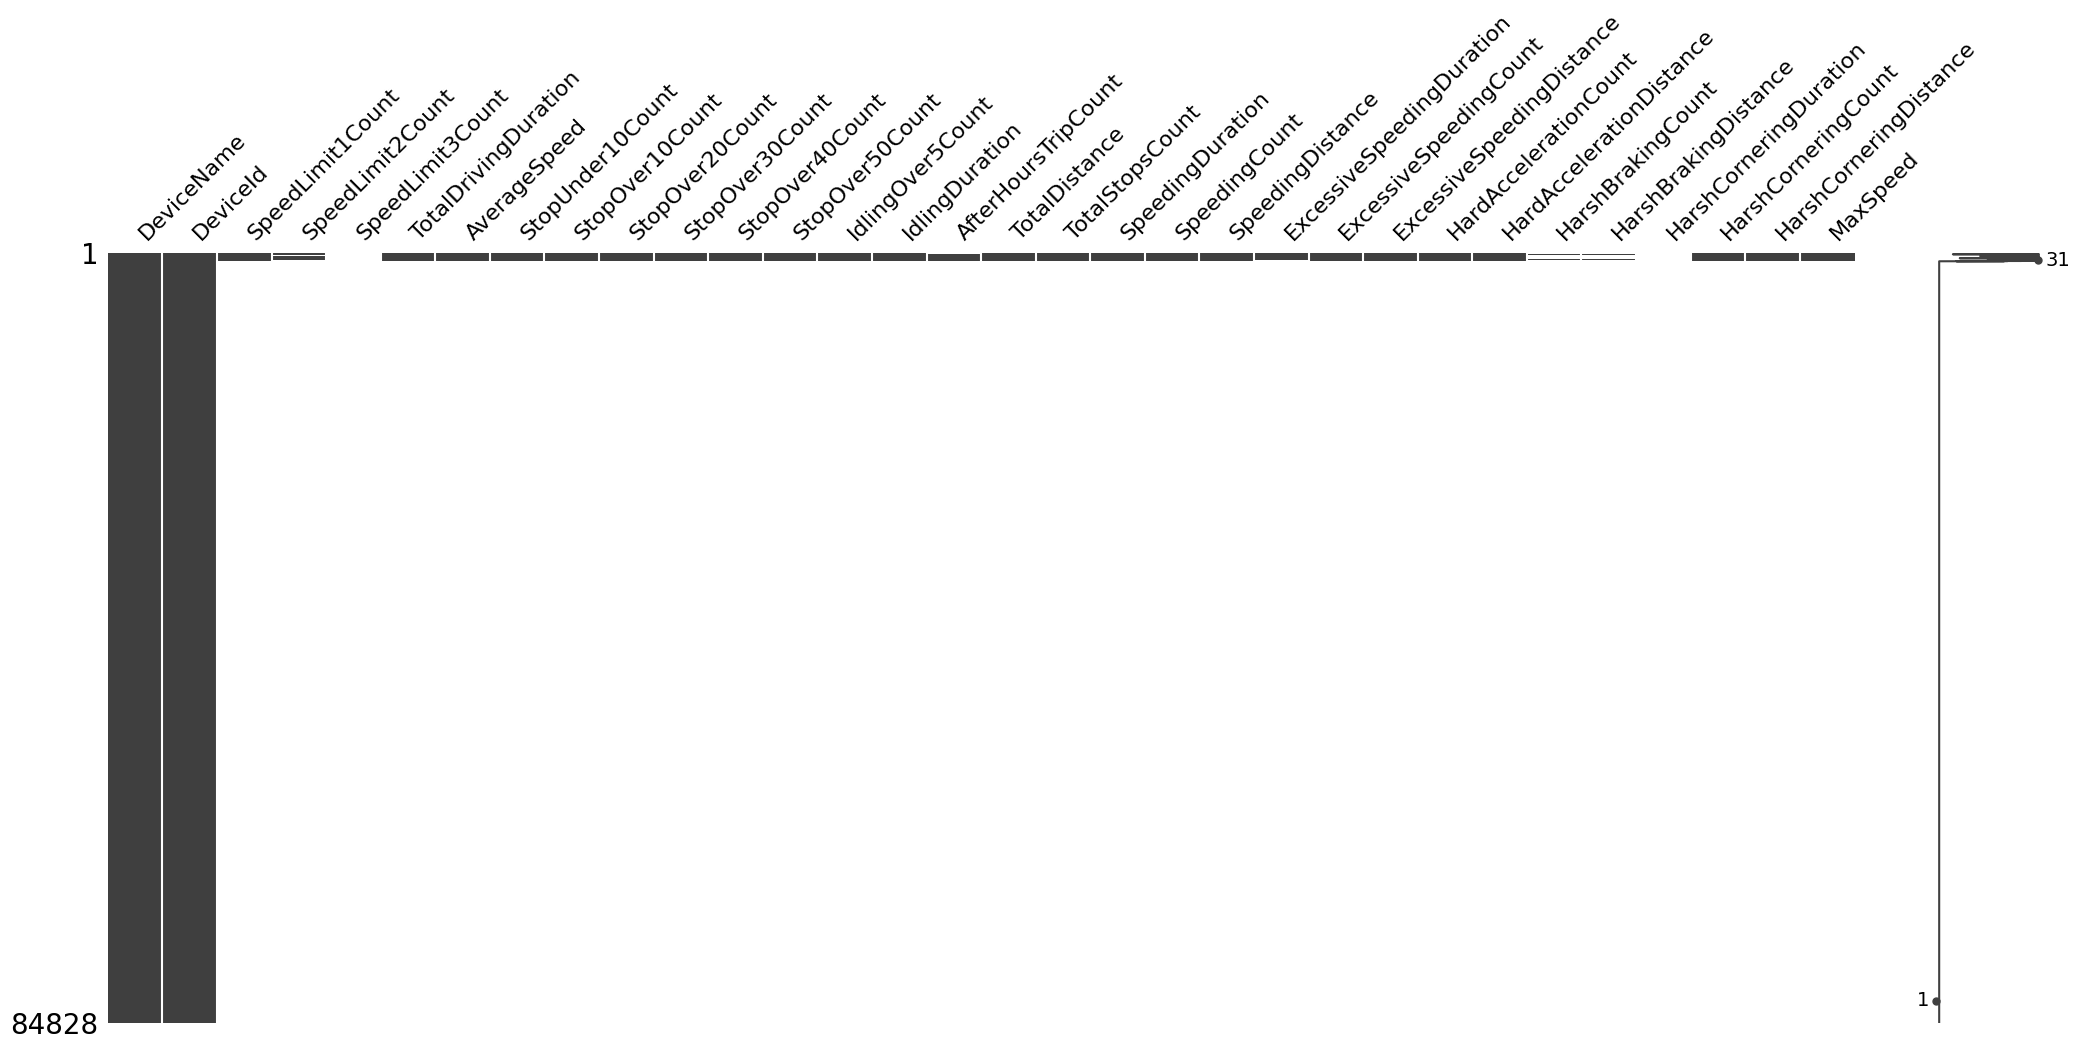

In [763]:
# Copia del dataframe para reemplazar ceros por NaN
df_zero_as_nan = df_safety.replace(0, np.nan)

# Visualizar la falta de datos y los ceros
msno.matrix(df_zero_as_nan)
plt.show()

In [764]:
# Verificar si hay filas duplicadas
duplicate_rows =df_safety[df_safety.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# Verificar si hay valores faltantes
print("\nMissing Values:")
print(df_safety.isnull().sum())

# Verificar si hay filas con valores en cero
rows_with_zero = df_safety[(df_safety == 0).any(axis=1)]
print("Number of rows with at least one zero value:", len(rows_with_zero))

# Verificar si hay valores en cero
print("\nValores en Cero:")
print((df_safety == 0).sum())


Number of duplicate rows: 0

Missing Values:
DeviceName                       1
DeviceId                         0
SpeedLimit1Count                 0
SpeedLimit2Count                 0
SpeedLimit3Count                 0
TotalDrivingDuration             0
AverageSpeed                 68444
StopUnder10Count                 0
StopOver10Count                  0
StopOver20Count                  0
StopOver30Count                  0
StopOver40Count                  0
StopOver50Count                  0
IdlingOver5Count                 0
IdlingDuration                   0
AfterHoursTripCount              0
TotalDistance                    0
TotalStopsCount              68444
SpeedingDuration                 0
SpeedingCount                    0
SpeedingDistance                 0
ExcessiveSpeedingDuration        0
ExcessiveSpeedingCount           0
ExcessiveSpeedingDistance        0
HardAccelerationCount            0
HardAccelerationDistance         0
HarshBrakingCount                0
HarshBraki

### Análisis del reporte de duplicados, valores faltantes y ceros

1. **Filas duplicadas:**
   - **Número de filas duplicadas:** 0  
     No se encontraron filas duplicadas en el dataframe, lo cual es positivo ya que garantiza que no se están repitiendo registros de manera innecesaria. Esto asegura que el análisis de los datos no será afectado por entradas duplicadas.

2. **Valores Faltantes:**
   - El análisis de valores faltantes muestra que las columnas **DeviceName** y **AverageSpeed** tienen 1 y 68,444 valores faltantes, respectivamente. Además, **TotalStopsCount** también tiene 68,444 valores faltantes, lo que coincide con la columna de velocidad promedio.
    - **AverageSpeed y TotalStopsCount:** Los valores faltantes en estas dos columnas probablemente estén relacionados, ya que ambos campos son críticos para el análisis de comportamiento en la conducción. Las filas que tienen datos faltantes en estas columnas podrían representar registros incompletos donde la información no se capturó correctamente.
    - **DeviceName:** Solo tiene un valor faltante, lo que no supone un problema significativo, pero aún debe investigarse y tratarse adecuadamente.

3. **Valores en Cero:**
   - **Número de filas con al menos un valor cero:** 84,828  
     Un número significativo de filas contiene al menos un valor cero, lo que sugiere que gran parte de los registros presentan condiciones en las que ciertos eventos no ocurrieron (por ejemplo, velocidad excedida o detenciones). Sin embargo, también es posible que algunos ceros representen datos faltantes.
   
4. **Columnas con altos valores en cero:**
   - **SpeedLimit1Count, SpeedLimit2Count, y SpeedLimit3Count:** Estas columnas tienen más de 83,000 valores en cero, lo que podría indicar que los límites de velocidad no se superaron con frecuencia o que estos eventos no se registraron adecuadamente.
   - **TotalDrivingDuration, IdlingDuration, y TotalDistance:** Estas columnas también tienen más de 83,000 valores en cero, lo cual es preocupante porque podrían impactar el análisis de la eficiencia del uso de los vehículos.
   - **HarshCorneringDuration:** Esta columna tiene 84,824 ceros, lo que sugiere que este evento específico rara vez ocurre o no se está midiendo correctamente en la mayoría de los casos.

5. **Implicaciones:**
   - **Datos faltantes:** Los valores faltantes en **AverageSpeed** y **TotalStopsCount** representan una gran porción de los datos (alrededor del 81.5%), lo que podría afectar el análisis y la creación de modelos si no se manejan adecuadamente. Se recomienda investigar las causas de estos valores faltantes y considerar opciones como la imputación o la eliminación de estas filas si es necesario.
   - **Datos en cero:** Los ceros en muchas columnas pueden representar eventos que no ocurrieron o podrían estar indicando problemas en la captura de datos. Se recomienda realizar un análisis adicional para determinar si estos ceros son relevantes para el análisis o si deberían tratarse como valores faltantes.
   - **Investigación adicional:** Es importante investigar la naturaleza de los ceros y los valores faltantes en estas columnas clave para asegurar la integridad del análisis y evitar interpretaciones erróneas.

Este análisis sugiere que será necesario realizar una limpieza de datos adicional y manejar los ceros y los valores faltantes de manera adecuada para asegurar resultados precisos en el análisis.







# EDA DataSet df_safety

In [765]:
df_safety.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DeviceName,84827,9281,5540,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceId,84828,84828,b5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpeedLimit1Count,84828.0,NaN,NaN,NaN,11.842316,150.875792,0.0,0.0,0.0,0.0,8374.0
SpeedLimit2Count,84828.0,NaN,NaN,NaN,0.048569,1.055622,0.0,0.0,0.0,0.0,85.0
SpeedLimit3Count,84828.0,NaN,NaN,NaN,0.000448,0.02569,0.0,0.0,0.0,0.0,3.0
TotalDrivingDuration,84828.0,NaN,NaN,NaN,278.877788,2930.888915,0.0,0.0,0.0,0.0,52617.0
AverageSpeed,16384.0,NaN,NaN,NaN,3.460925,70.232288,0.0,0.0,0.0,0.0,8854.3
StopUnder10Count,84828.0,NaN,NaN,NaN,2.298958,24.549934,0.0,0.0,0.0,0.0,1058.0
StopOver10Count,84828.0,NaN,NaN,NaN,0.871634,9.136239,0.0,0.0,0.0,0.0,172.0
StopOver20Count,84828.0,NaN,NaN,NaN,0.346419,3.67105,0.0,0.0,0.0,0.0,86.0


## ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Este análisis describe un conjunto de datos con estadísticas descriptivas, destacando información clave para cada columna en el DataFrame. A continuación se ofrece un resumen de cada sección y sus principales observaciones:

#### **DeviceName y DeviceId:**

- DeviceName: Tiene 84,827 registros con 9,281 valores únicos, lo que sugiere una gran variedad de dispositivos. El dispositivo más frecuente aparece 52 veces, lo que indica algunos dispositivos se repiten con frecuencia.

 - DeviceId: Cada registro tiene un identificador único (84,828 registros únicos), lo que asegura que cada entrada está vinculada a un dispositivo distinto.


#### **Conteo de eventos por límites de velocidad (SpeedLimit1Count, SpeedLimit2Count, SpeedLimit3Count):**

Las columnas relacionadas con los eventos de límites de velocidad muestran valores con muchas observaciones que son cero, como se puede deducir de los percentiles. En SpeedLimit1Count, aunque el valor promedio es 11.84, el 75% de los registros tienen un valor de 0, lo que indica que la mayoría de los eventos tienen una baja frecuencia o no se registran.

#### **Duraciones y velocidades medias (TotalDrivingDuration, AverageSpeed):**

- TotalDrivingDuration: La duración promedio es de 278.88 segundos, con una desviación estándar alta (2,930.89), lo que indica variabilidad significativa entre los eventos.
- AverageSpeed: Solo 16,384 de los 84,828 registros tienen valores, con una velocidad promedio de 3.46, aunque nuevamente, la mayoría de los registros (75%) son cero.

#### **Paradas (Stops) y ralentí (Idling):**

Las columnas relacionadas con las paradas (por debajo o por encima de ciertos tiempos) tienen valores promedio bajos, indicando que estos eventos son relativamente infrecuentes. El valor más alto en cualquier categoría es de 1058 para StopUnder10Count, pero la mayoría de los percentiles (hasta el 75%) siguen siendo ceros.

IdlingOver5Count y IdlingDuration muestran que el ralentí es más común, con promedios de 3.51 y 316.27, respectivamente, aunque siguen teniendo una gran cantidad de registros en cero.

#### **Distancias totales (TotalDistance) y excesos de velocidad (Speeding):**

- TotalDistance: La distancia promedio es de 255.48, pero la mayoría de los registros tienen un valor de 0, lo que indica que en muchos casos no se registra una distancia significativa.

#### **Eventos de exceso de velocidad (SpeedingDuration, SpeedingCount, ExcessiveSpeedingDuration)**

Las columnas de eventos de exceso de velocidad (SpeedingDuration, SpeedingCount, ExcessiveSpeedingDuration)
Muestran que estos eventos son bastante raros, ya que los percentiles 50% y 75% son 0, aunque los valores máximos pueden ser relativamente altos.

#### **Aceleración y frenado brusco (HardAcceleration, HarshBraking):**

Las ocurrencias de aceleración y frenado brusco son muy poco comunes, con valores promedio cercanos a cero, y con un máximo de 349 eventos para aceleración brusca. La mayor parte de los registros tiene estos valores en cero.

#### **Curvas bruscas (HarshCornering):**

Tanto las duraciones como los conteos de eventos de curvas bruscas son raros. La mayoría de los registros no tienen eventos, y el promedio de ocurrencias es bajo (0.439).

#### **Velocidad máxima (MaxSpeed):**

Aunque la mayoría de los registros tiene un valor de cero, la velocidad máxima puede llegar hasta 100.66 en algunos casos, lo que podría indicar eventos aislados de altas velocidades.

### **Conclusiones:**
- Datos escasos: Muchas columnas contienen valores principalmente en cero, lo que sugiere que la mayoría de los eventos no ocurrieron o no fueron registrados.
- Eventos raros: Aceleraciones bruscas, frenados bruscos y excesos de velocidad son eventos que ocurren rara vez, como lo indican las bajas frecuencias y valores promedio.
- Distribución desigual: La alta desviación estándar en varias columnas sugiere una gran variabilidad entre los registros, con unos pocos valores altos que influyen en el promedio.

## ¿Hay correlación entre las variables?

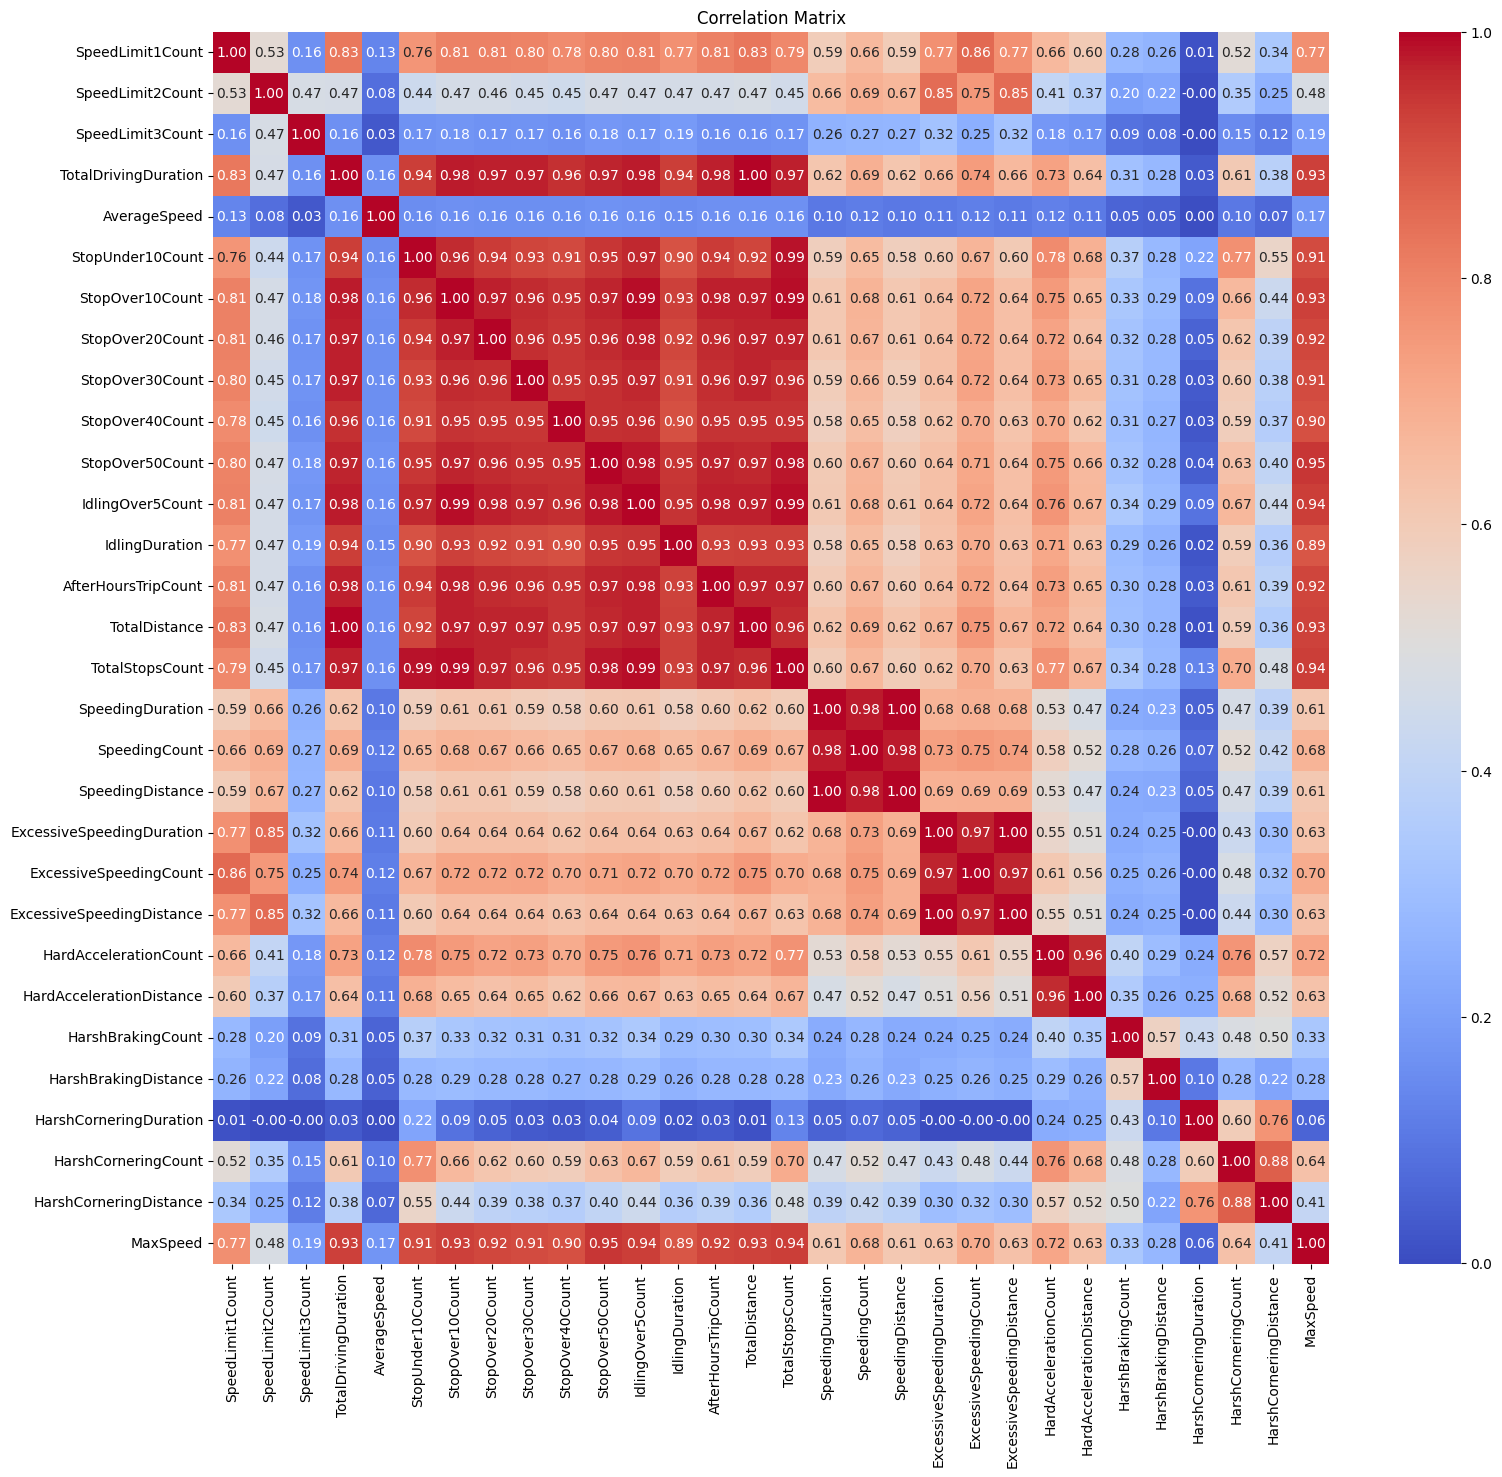

                           SpeedLimit1Count  SpeedLimit2Count  \
SpeedLimit1Count                   1.000000          0.525875   
SpeedLimit2Count                   0.525875          1.000000   
SpeedLimit3Count                   0.160380          0.473898   
TotalDrivingDuration               0.825097          0.470917   
AverageSpeed                       0.134021          0.078044   
StopUnder10Count                   0.761315          0.438096   
StopOver10Count                    0.807902          0.468075   
StopOver20Count                    0.806348          0.464676   
StopOver30Count                    0.801415          0.453860   
StopOver40Count                    0.781821          0.447803   
StopOver50Count                    0.801049          0.470819   
IdlingOver5Count                   0.808197          0.465554   
IdlingDuration                     0.770783          0.467692   
AfterHoursTripCount                0.805702          0.465700   
TotalDistance            

In [766]:
mostrar_matriz_correlacion(df_safety,18,16)

## Histogramas

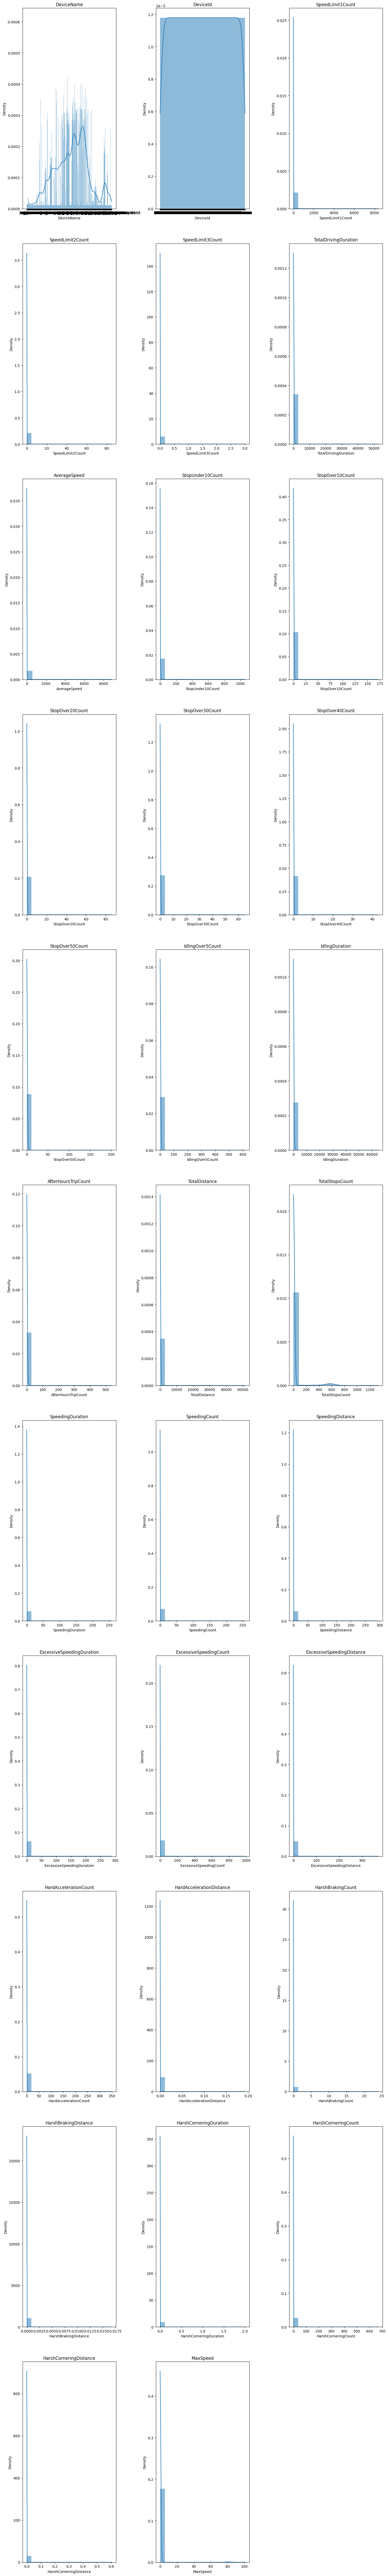

In [767]:
# Number of columns
num_cols = len(df_safety.columns)


# Calculate grid size for subplots
rows = (num_cols // 3) + 1  # Adjust this as per your layout preference (4 columns per row)
cols = min(num_cols, 3)

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each column's histogram
index = 0
for col_name, col_data in df_safety.items():
    sns.histplot(col_data, ax=axs[index], kde=True, stat='density', linewidth=0)
    axs[index].set_title(col_name)
    index += 1

# Remove any extra axes
for ax in axs[index:]:
    ax.remove()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Los histogramas en esta base muestran aún mucho ruido. Es necesario limpieza adicional.

Vamos a intentar una aproximación adicional: resumir los datos de los dispositivos. Es decir, generar una tabla resumen que para cada dispositivo en cada columna traiga el promedio de esa columna para dicho dispositivo.

In [768]:
df_safety_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84828 entries, 0 to 84827
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 84827 non-null  object 
 1   DeviceId                   84828 non-null  object 
 2   SpeedLimit1Count           84828 non-null  int64  
 3   SpeedLimit2Count           84828 non-null  int64  
 4   SpeedLimit3Count           84828 non-null  int64  
 5   TotalDrivingDuration       84828 non-null  int64  
 6   AverageSpeed               16384 non-null  float64
 7   StopUnder10Count           84828 non-null  int64  
 8   StopOver10Count            84828 non-null  int64  
 9   StopOver20Count            84828 non-null  int64  
 10  StopOver30Count            84828 non-null  int64  
 11  StopOver40Count            84828 non-null  int64  
 12  StopOver50Count            84828 non-null  int64  
 13  IdlingOver5Count           84828 non-null  int

Este es el código que genera el resumen, pasando de 84828 registros a 9289.

In [769]:


# Crear la tabla df_safety_summary, sin la columna 'DeviceId', tomando el promedio de los valores por 'DeviceName'
df_safety_summary = df_safety_original.drop(columns=['DeviceId']).groupby('DeviceName').mean().reset_index()


In [770]:
df_safety_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 9281 non-null   object 
 1   SpeedLimit1Count           9281 non-null   float64
 2   SpeedLimit2Count           9281 non-null   float64
 3   SpeedLimit3Count           9281 non-null   float64
 4   TotalDrivingDuration       9281 non-null   float64
 5   AverageSpeed               3208 non-null   float64
 6   StopUnder10Count           9281 non-null   float64
 7   StopOver10Count            9281 non-null   float64
 8   StopOver20Count            9281 non-null   float64
 9   StopOver30Count            9281 non-null   float64
 10  StopOver40Count            9281 non-null   float64
 11  StopOver50Count            9281 non-null   float64
 12  IdlingOver5Count           9281 non-null   float64
 13  IdlingDuration             9281 non-null   float

Ahora. vamos a explorar de esta base, cuántos dispositivos tienen todos los registros en cero o con errores. Son 8371

In [771]:
# Filtrar todas las filas donde todos los valores (excepto 'DeviceName') sean cero o errores
df_safety_summary_all_zero_or_nan = df_safety_summary[
    df_safety_summary.drop(columns=['DeviceName']).apply(lambda row: all((x == 0 or pd.isna(x)) for x in row), axis=1)
]
df_safety_summary_all_zero_or_nan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8371 entries, 0 to 9280
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 8371 non-null   object 
 1   SpeedLimit1Count           8371 non-null   float64
 2   SpeedLimit2Count           8371 non-null   float64
 3   SpeedLimit3Count           8371 non-null   float64
 4   TotalDrivingDuration       8371 non-null   float64
 5   AverageSpeed               2298 non-null   float64
 6   StopUnder10Count           8371 non-null   float64
 7   StopOver10Count            8371 non-null   float64
 8   StopOver20Count            8371 non-null   float64
 9   StopOver30Count            8371 non-null   float64
 10  StopOver40Count            8371 non-null   float64
 11  StopOver50Count            8371 non-null   float64
 12  IdlingOver5Count           8371 non-null   float64
 13  IdlingDuration             8371 non-null   float64
 1

Hemos creado una tabla safety_summary_clean así:

1. Hemos tomado para cada DeviceName el promedio de sus valores correspondientes por cada columna. Esto implicó eliminar el DeviceID.
2. Hemos eliminado aquellos registros para el cual hemos detectado que todas las columnas están en cero. El resultado todal es una base de 910 filas.

In [772]:
# Crear una nueva base eliminando todas las filas donde absolutamente todos los valores excepto 'DeviceName' sean cero o errores
df_safety_summary_clean = df_safety_summary[
    ~df_safety_summary.drop(columns=['DeviceName']).apply(lambda row: all((x == 0 or pd.isna(x)) for x in row), axis=1)
]



Esta es una mnuestra de la base final, con el resumen de los dispositivos con datos. Han quedado al final 910 filas.

In [773]:
df_safety_summary_clean.head()

,DeviceName,SpeedLimit1Count,SpeedLimit2Count,SpeedLimit3Count,TotalDrivingDuration,AverageSpeed,StopUnder10Count,StopOver10Count,StopOver20Count,StopOver30Count,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
74,1000,400.333333,0.333333,0.0,8970.333333,18.40,74.666667,23.666667,10.0,9.666667,...,41.333333,10.180212,23.0,0.011580,0.0,0.0,0.0,27.333333,0.009334,28.168828
75,1001,336.000000,0.000000,0.0,27094.000000,57.90,175.000000,39.000000,12.0,23.000000,...,4.000000,0.120072,42.0,0.013646,0.0,0.0,0.0,63.000000,0.047502,78.914139
76,1002,1363.000000,19.000000,0.0,34431.000000,55.00,282.000000,121.000000,49.0,30.000000,...,286.000000,112.770882,114.0,0.050185,0.0,0.0,0.0,19.000000,0.002770,85.749222
77,1003,391.000000,0.000000,0.0,12357.000000,29.45,73.500000,26.000000,12.5,8.000000,...,22.500000,4.474617,20.0,0.009465,0.0,0.0,0.0,26.500000,0.011286,40.078442
78,1004,408.000000,0.000000,0.0,27209.000000,52.10,255.000000,102.000000,45.0,36.000000,...,47.000000,11.129641,32.0,0.003896,0.0,0.0,0.0,26.000000,0.006231,78.914139


Ahora vamos a graficar los datos

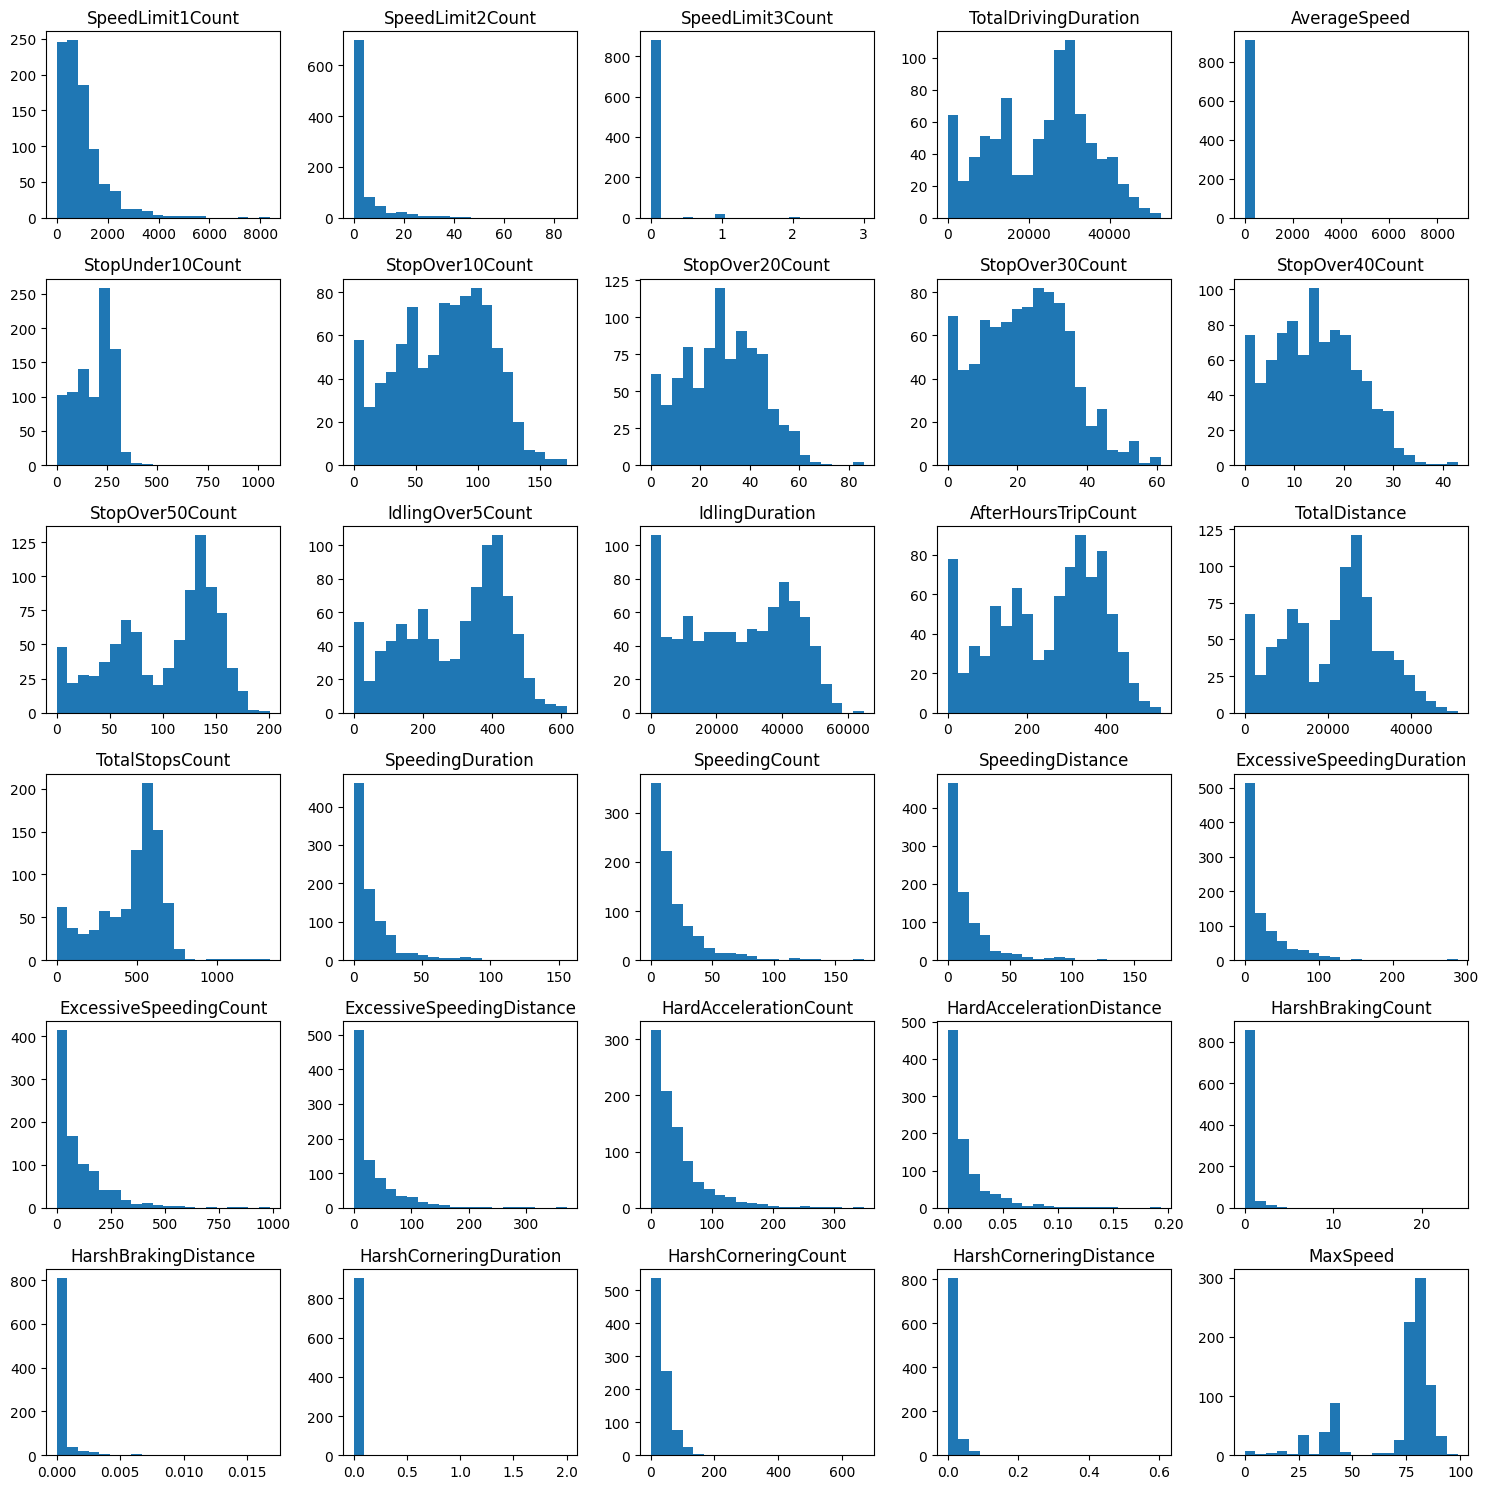

In [774]:
import matplotlib.pyplot as plt

# Crear histogramas para todas las columnas del DataFrame, excluyendo 'DeviceName'
df_safety_summary_clean.hist(figsize=(15, 15), bins=20, grid=False)
plt.tight_layout()
plt.show()


Como se ve, las distribuciones están sesgadas. Vamos a  centrarlas con una transformación raíz cuadrada.

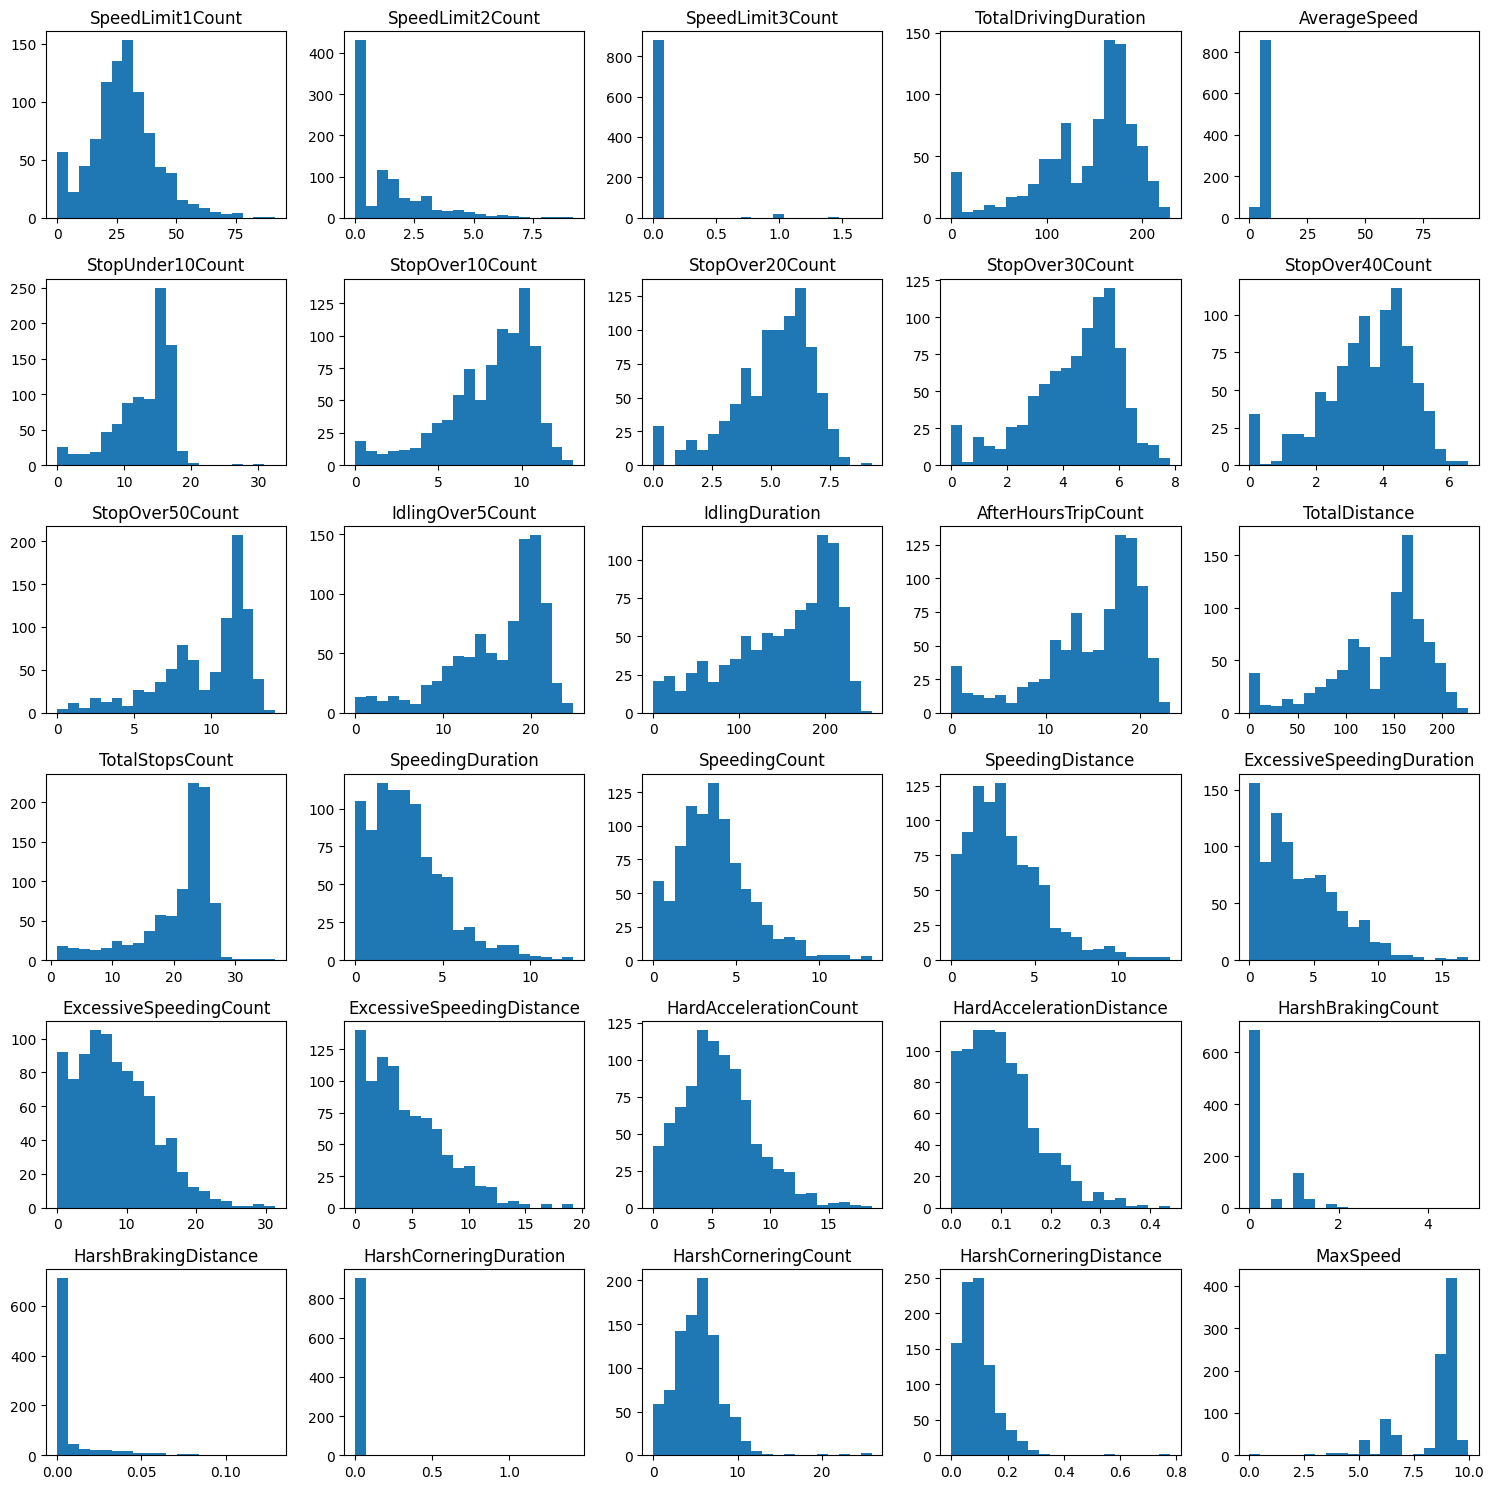

In [775]:

# Aplicar la transformación de raíz cuadrada a todas las columnas numéricas que no tengan valores negativos
df_safety_summary_sqrt = df_safety_summary_clean.copy()

# Evitar errores en valores negativos aplicando raíz cuadrada solo donde sea posible
for column in df_safety_summary_clean.columns:
    if column != 'DeviceName':  # Excluir 'DeviceName' de la transformación
        # Filtrar las columnas que tienen valores mayores o iguales a 0 para aplicar la raíz cuadrada
        if (df_safety_summary_clean[column] >= 0).all():
            df_safety_summary_sqrt[column] = np.sqrt(df_safety_summary_clean[column])

# Crear los histogramas después de la transformación de raíz cuadrada
df_safety_summary_sqrt.hist(figsize=(15, 15), bins=20, grid=False)
plt.tight_layout()
plt.show()


Y ahora haremos el mapa de correlaciones con la base resumida y limpia

In [ ]:
mostrar_matriz_correlacion(df_safety_summary_clean,18,16)



In [777]:
# Reemplazar los valores 0 por NaN en df_safety
df_safety_nan = df_safety_original.replace(0, np.nan)

## Análisis de Filas con Valores Cero

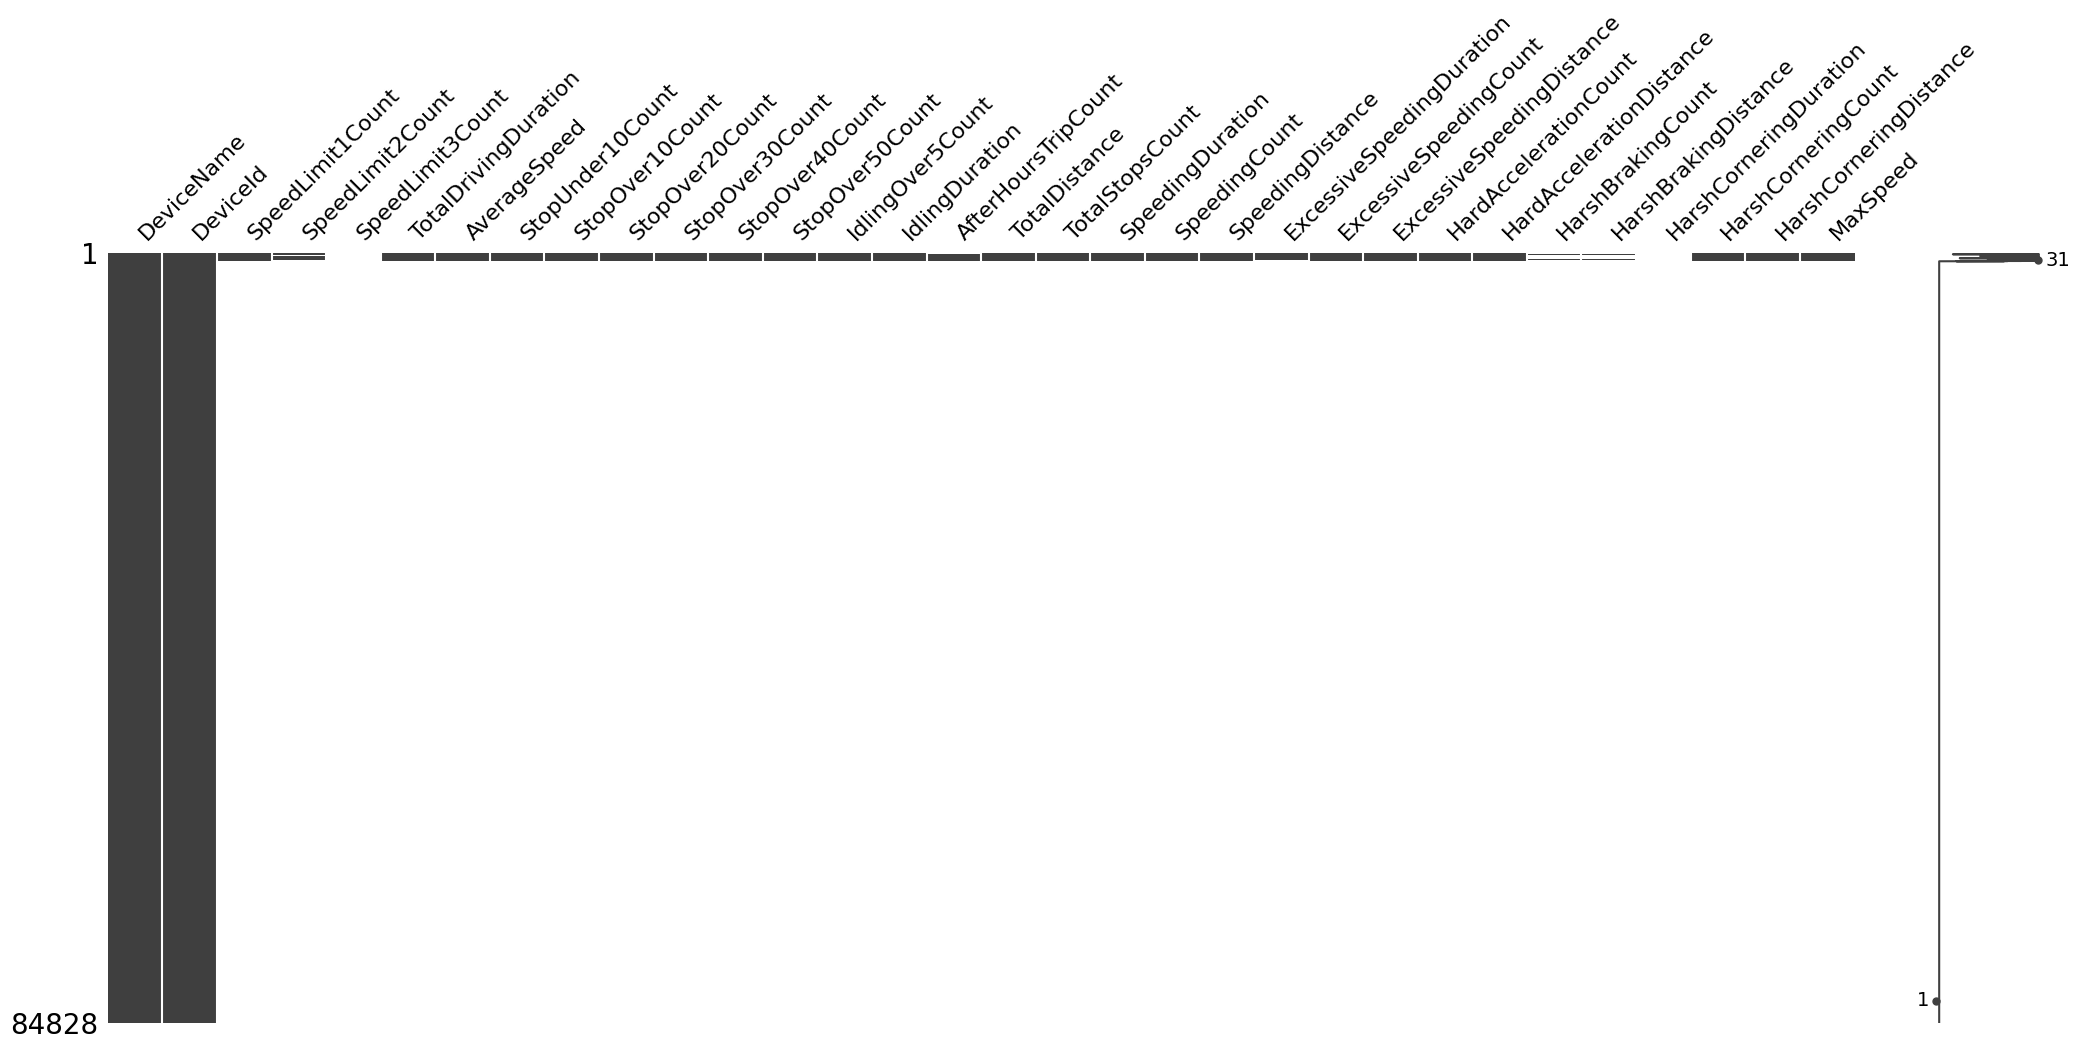

In [778]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_safety_nan)
plt.show()

# Exportar archivos csv a capa silver

In [779]:
# prompt: export csv files for all dataframes


df_idling_limpio.to_csv('/content/drive/MyDrive/TECForza/clean_silver_idling.csv', index=False)

df_consumption_limpio.to_csv('/content/drive/MyDrive/TECForza/clean_silver_consumption.csv', index=False)

print("DataFrames exportados como archivos CSV a Google Drive.")


DataFrames exportados como archivos CSV a Google Drive.
DataFrames exportados como archivos CSV a Google Drive.
